In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pickle


print("Library imported succdesfully")

Library imported succdesfully


In [5]:
pd.set_option("display.max_columns",None)

In [9]:
df = pd.read_csv("startup data.csv")

In [10]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [11]:
print("\n" + "="*50)
print("STEP 3: DATA QUALITY ASSESSMENT")
print("="*50)

# Missing values analysis
print("🔍 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])


STEP 3: DATA QUALITY ASSESSMENT
🔍 Missing Values Analysis:
                          Missing Count  Missing Percentage
closed_at                           588           63.705309
Unnamed: 6                          493           53.412784
age_last_milestone_year             152           16.468039
age_first_milestone_year            152           16.468039
state_code.1                          1            0.108342


In [27]:
print("\n📊 Basic Statistics:")
print(df.describe(include=['float64','int64']))


📊 Basic Statistics:
        Unnamed: 0    latitude   longitude      labels  \
count   923.000000  923.000000  923.000000  923.000000   
mean    572.297941   38.517442 -103.539212    0.646804   
std     333.585431    3.741497   22.394167    0.478222   
min       1.000000   25.752358 -122.756956    0.000000   
25%     283.500000   37.388869 -122.198732    0.000000   
50%     577.000000   37.779281 -118.374037    1.000000   
75%     866.500000   40.730646  -77.214731    1.000000   
max    1153.000000   59.335232   18.057121    1.000000   

       age_first_funding_year  age_last_funding_year  \
count              923.000000             923.000000   
mean                 2.235630               3.931456   
std                  2.510449               2.967910   
min                 -9.046600              -9.046600   
25%                  0.576700               1.669850   
50%                  1.446600               3.528800   
75%                  3.575350               5.560250   
max     


STEP 4: TARGET VARIABLE ANALYSIS
🎯 Target Variable Distribution:
status
acquired    597
closed      326
Name: count, dtype: int64

Target Variable Percentages:
status
acquired    64.68039
closed      35.31961
Name: proportion, dtype: float64


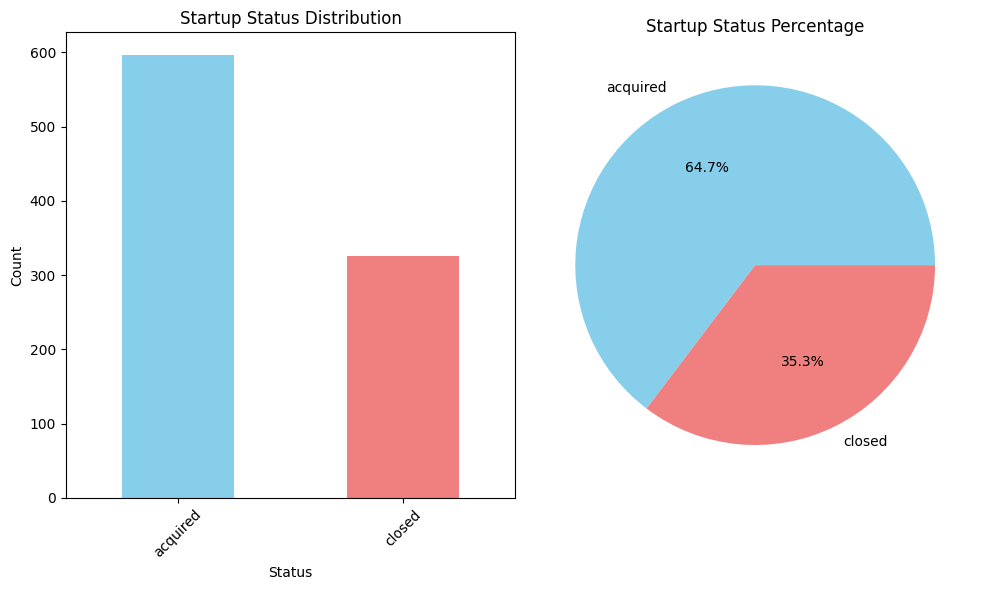

In [13]:
# Step 4: Target Variable Analysis
print("\n" + "="*50)
print("STEP 4: TARGET VARIABLE ANALYSIS")
print("="*50)

# Analyze the target variable (status)
print("🎯 Target Variable Distribution:")
target_counts = df['status'].value_counts()
print(target_counts)
print(f"\nTarget Variable Percentages:")
print(df['status'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['status'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Startup Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Startup Status Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()


STEP 5: NUMERICAL FEATURES ANALYSIS
📊 Numerical Columns (35):
  - Unnamed: 0
  - latitude
  - longitude
  - labels
  - age_first_funding_year
  - age_last_funding_year
  - age_first_milestone_year
  - age_last_milestone_year
  - relationships
  - funding_rounds
  - funding_total_usd
  - milestones
  - is_CA
  - is_NY
  - is_MA
  - is_TX
  - is_otherstate
  - is_software
  - is_web
  - is_mobile
  - is_enterprise
  - is_advertising
  - is_gamesvideo
  - is_ecommerce
  - is_biotech
  - is_consulting
  - is_othercategory
  - has_VC
  - has_angel
  - has_roundA
  - has_roundB
  - has_roundC
  - has_roundD
  - avg_participants
  - is_top500

🔑 Key Numerical Features for Analysis:
  ✅ age_first_funding_year
  ✅ age_last_funding_year
  ✅ relationships
  ✅ funding_rounds
  ✅ funding_total_usd
  ✅ milestones
  ✅ avg_participants


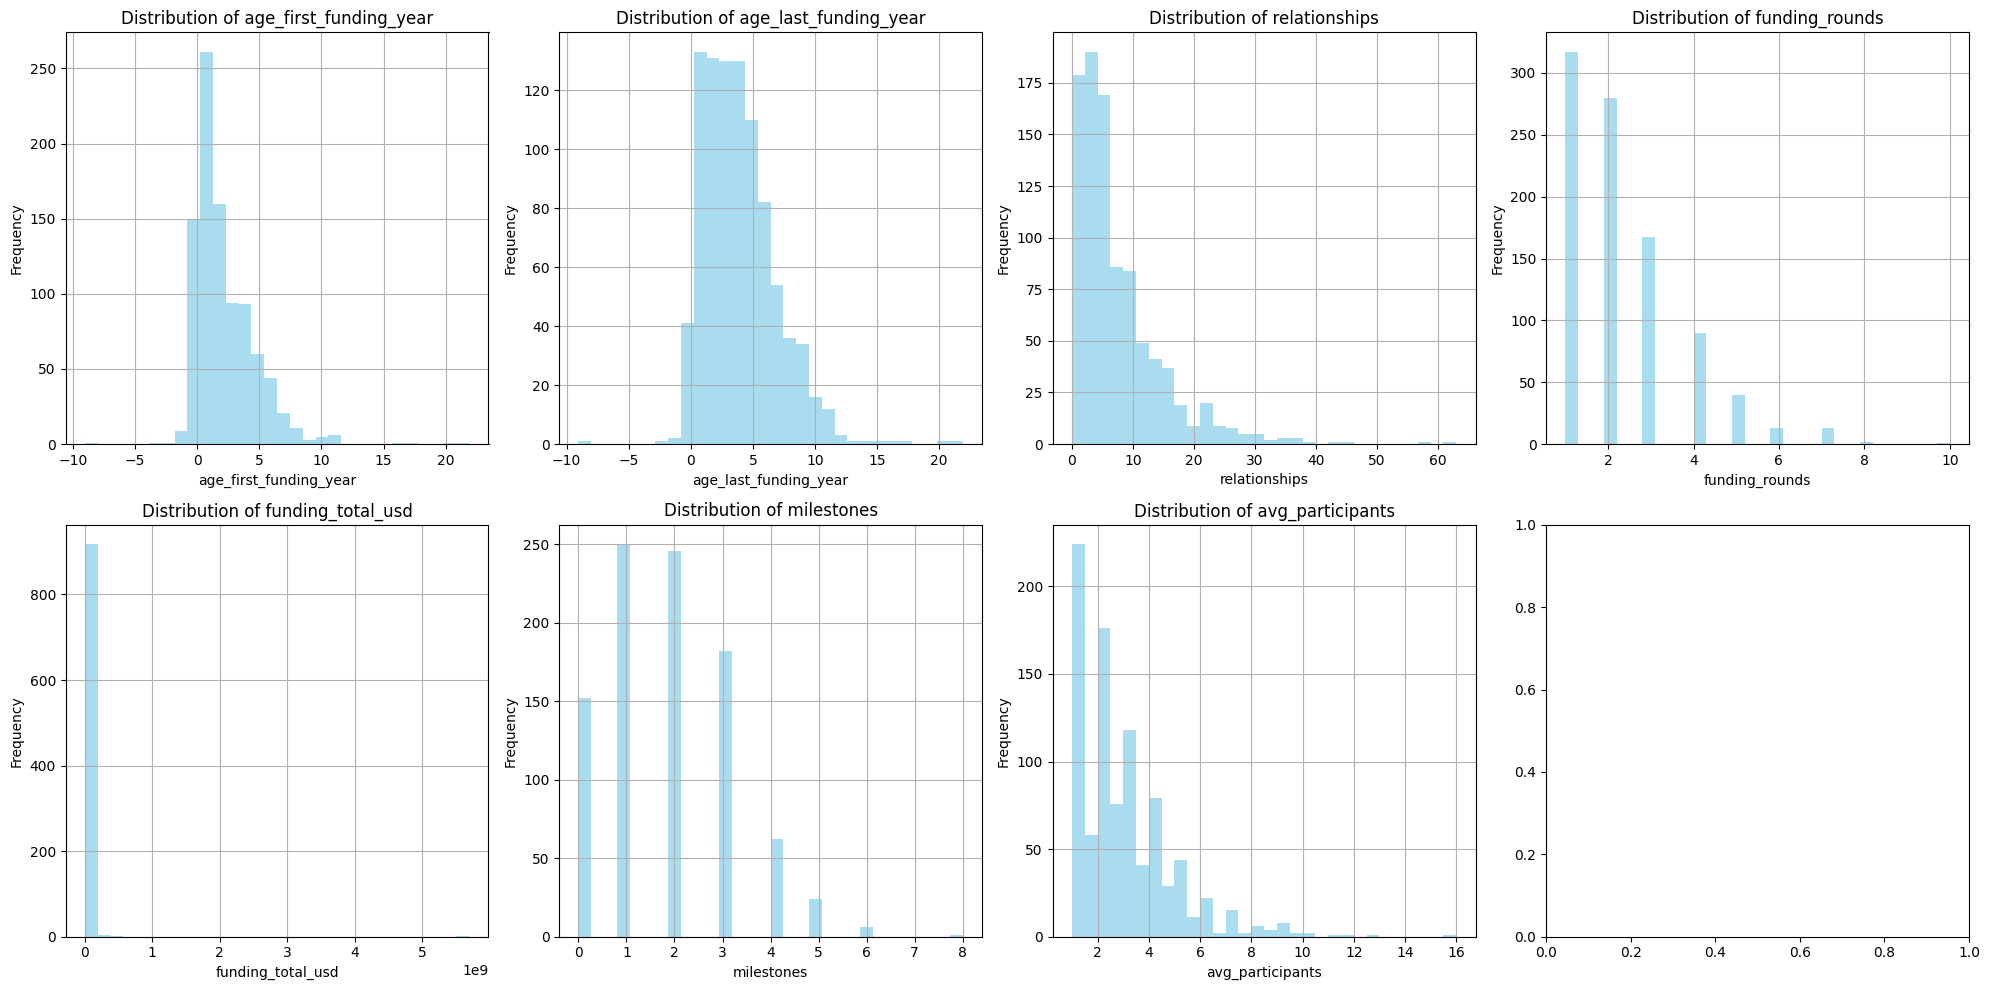

In [14]:
# Step 5: Numerical Features Analysis
print("\n" + "="*50)
print("STEP 5: NUMERICAL FEATURES ANALYSIS")
print("="*50)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Numerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

# Key numerical features for analysis
key_numerical = ['age_first_funding_year', 'age_last_funding_year', 'relationships', 
                'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants']

print(f"\n🔑 Key Numerical Features for Analysis:")
for col in key_numerical:
    if col in df.columns:
        print(f"  ✅ {col}")
    else:
        print(f"  ❌ {col} (not found)")

# Distribution of key numerical features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(key_numerical):
    if col in df.columns and i < 8:
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
# Step 6: Categorical Features Analysis
print("="*50)
print("STEP 6: CATEGORICAL FEATURES ANALYSIS")
print("="*50)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"📊 Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")

# Analyze key categorical features
key_categorical = ['state_code', 'city', 'category_code']

for col in key_categorical:
    if col in df.columns:
        print(f"\n🔍 {col} - Top 10 values:")
        print(df[col].value_counts().head(10))

STEP 6: CATEGORICAL FEATURES ANALYSIS
📊 Categorical Columns (14):
  - state_code
  - zip_code
  - id
  - city
  - Unnamed: 6
  - name
  - founded_at
  - closed_at
  - first_funding_at
  - last_funding_at
  - state_code.1
  - category_code
  - object_id
  - status

🔍 state_code - Top 10 values:
state_code
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
Name: count, dtype: int64

🔍 city - Top 10 values:
city
San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Santa Clara       27
Austin            27
San Mateo         26
Seattle           26
Sunnyvale         22
San Jose          18
Name: count, dtype: int64

🔍 category_code - Top 10 values:
category_code
software           153
web                144
mobile              79
enterprise          73
advertising         62
games_video         52
semiconductor       35
network_hosting     34
biotech             34
hardware            27
Name: count, dtype: int6


STEP 7: GEOGRAPHIC ANALYSIS
🗺️ State-wise Startup Distribution:
state_code
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
Name: count, dtype: int64


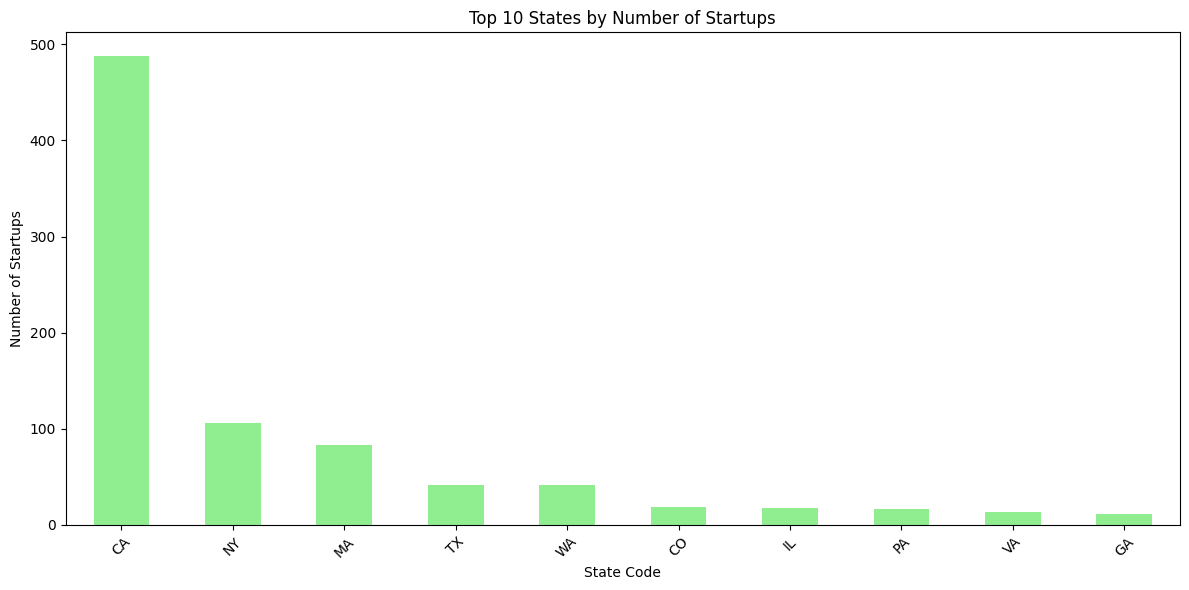

In [16]:
# Step 7: Geographic Analysis
print("\n" + "="*50)
print("STEP 7: GEOGRAPHIC ANALYSIS")
print("="*50)

# State-wise analysis
if 'state_code' in df.columns:
    print("🗺️ State-wise Startup Distribution:")
    state_counts = df['state_code'].value_counts().head(10)
    print(state_counts)
    
    # Plot state distribution
    plt.figure(figsize=(12, 6))
    state_counts.plot(kind='bar', color='lightgreen')
    plt.title('Top 10 States by Number of Startups')
    plt.xlabel('State Code')
    plt.ylabel('Number of Startups')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
# Step 8: Binary Features Analysis
print("\n" + "="*50)
print("STEP 8: BINARY FEATURES ANALYSIS")
print("="*50)

# Identify binary features (0/1 columns)
binary_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1}):
            binary_cols.append(col)

print(f"🔢 Binary Features ({len(binary_cols)}):")
for col in binary_cols:
    print(f"  - {col}: {df[col].sum()} ones out of {len(df)} ({df[col].mean()*100:.1f}%)")


STEP 8: BINARY FEATURES ANALYSIS
🔢 Binary Features (23):
  - labels: 597 ones out of 923 (64.7%)
  - is_CA: 487 ones out of 923 (52.8%)
  - is_NY: 106 ones out of 923 (11.5%)
  - is_MA: 83 ones out of 923 (9.0%)
  - is_TX: 42 ones out of 923 (4.6%)
  - is_otherstate: 204 ones out of 923 (22.1%)
  - is_software: 153 ones out of 923 (16.6%)
  - is_web: 144 ones out of 923 (15.6%)
  - is_mobile: 79 ones out of 923 (8.6%)
  - is_enterprise: 73 ones out of 923 (7.9%)
  - is_advertising: 62 ones out of 923 (6.7%)
  - is_gamesvideo: 52 ones out of 923 (5.6%)
  - is_ecommerce: 25 ones out of 923 (2.7%)
  - is_biotech: 34 ones out of 923 (3.7%)
  - is_consulting: 3 ones out of 923 (0.3%)
  - is_othercategory: 298 ones out of 923 (32.3%)
  - has_VC: 301 ones out of 923 (32.6%)
  - has_angel: 235 ones out of 923 (25.5%)
  - has_roundA: 469 ones out of 923 (50.8%)
  - has_roundB: 362 ones out of 923 (39.2%)
  - has_roundC: 215 ones out of 923 (23.3%)
  - has_roundD: 92 ones out of 923 (10.0%)
  -


STEP 9: FEATURE RELATIONSHIPS WITH TARGET
🎯 Correlation with Target Variable (labels):
labels                      1.000000
relationships               0.360434
milestones                  0.328260
is_top500                   0.310652
age_last_milestone_year     0.265871
has_roundB                  0.208257
funding_rounds              0.206049
avg_participants            0.185992
has_roundA                  0.184307
has_roundC                  0.165902
age_first_milestone_year    0.162279
has_roundD                  0.139940
is_MA                       0.081735
is_CA                       0.077217
is_enterprise               0.073772
age_last_funding_year       0.073731
is_NY                       0.059996
latitude                    0.046560
is_advertising              0.044355
funding_total_usd           0.040176
is_software                 0.012429
is_mobile                   0.007312
is_consulting               0.002373
is_biotech                  0.000104
is_web                  

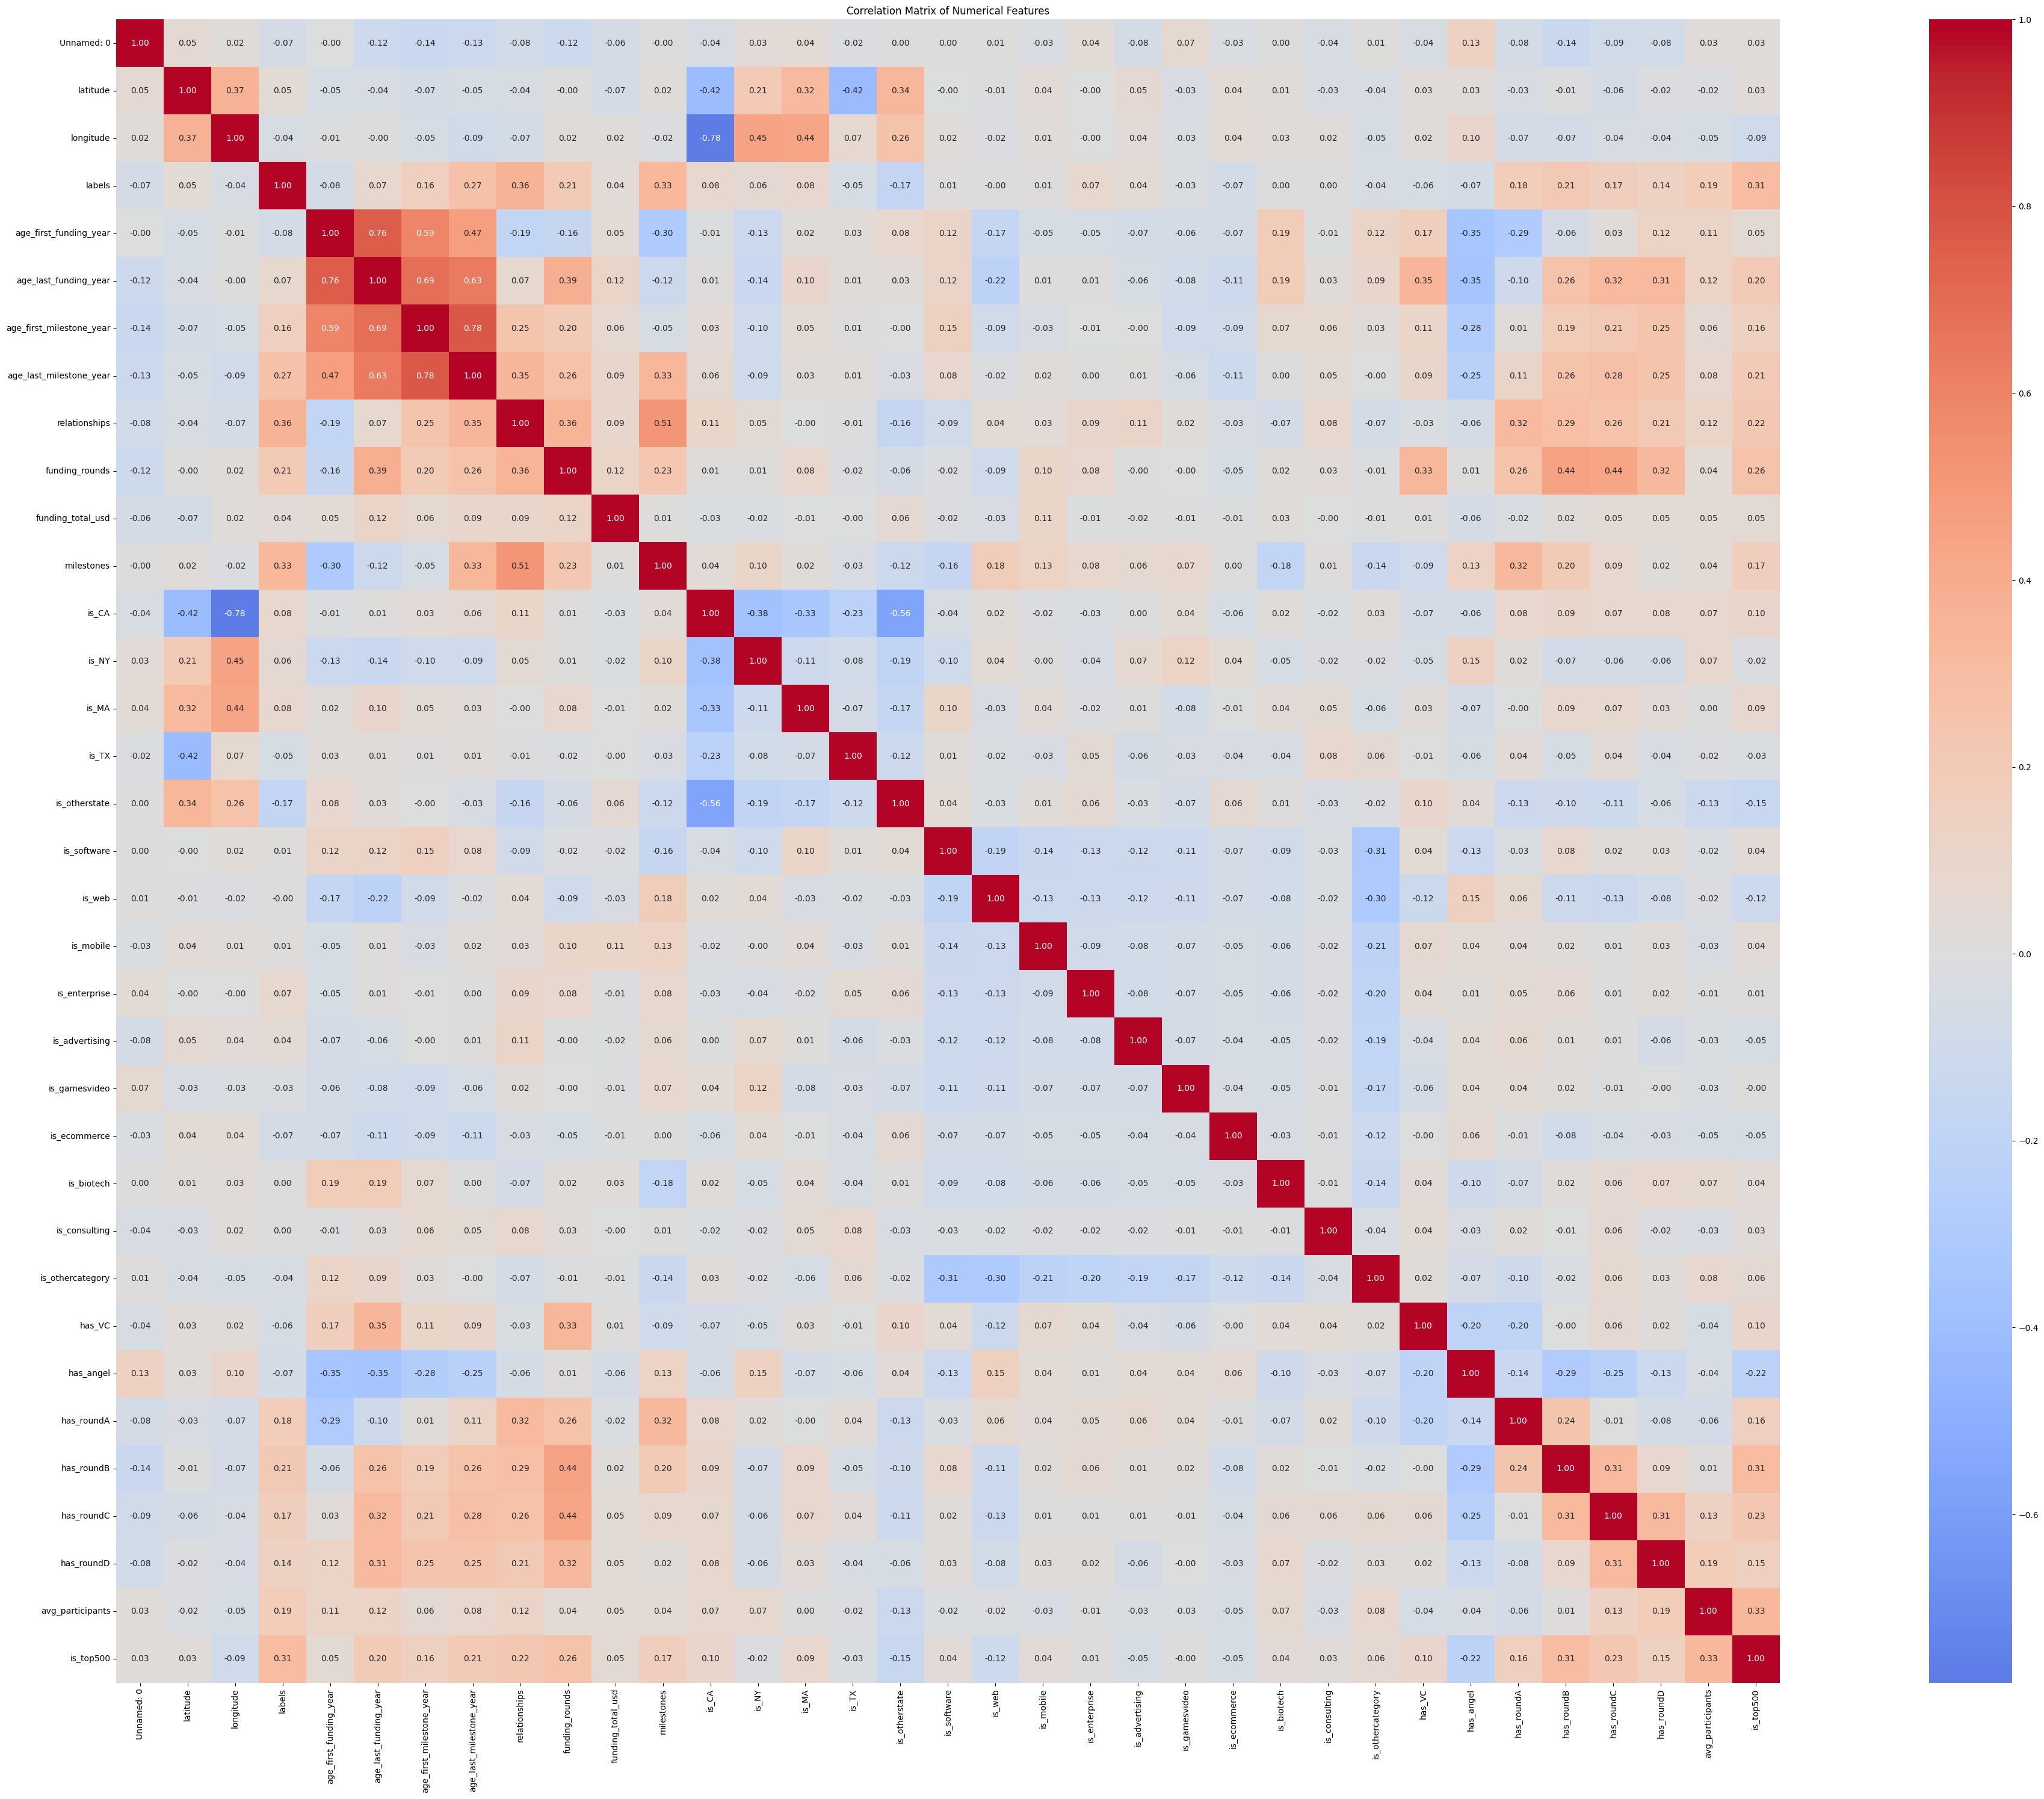

In [23]:
# Step 9: Feature Relationships with Target
print("\n" + "="*50)
print("STEP 9: FEATURE RELATIONSHIPS WITH TARGET")
print("="*50)

# Correlation analysis for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'labels' in numerical_features:
    corr_with_target = df[numerical_features].corr()['labels'].sort_values(ascending=False)
    print("🎯 Correlation with Target Variable (labels):")
    print(corr_with_target)
    
    # Plot correlation heatmap
    plt.figure(figsize=(50, 30))
    correlation_matrix = df[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()


STEP 10: DETAILED CORRELATION ANALYSIS


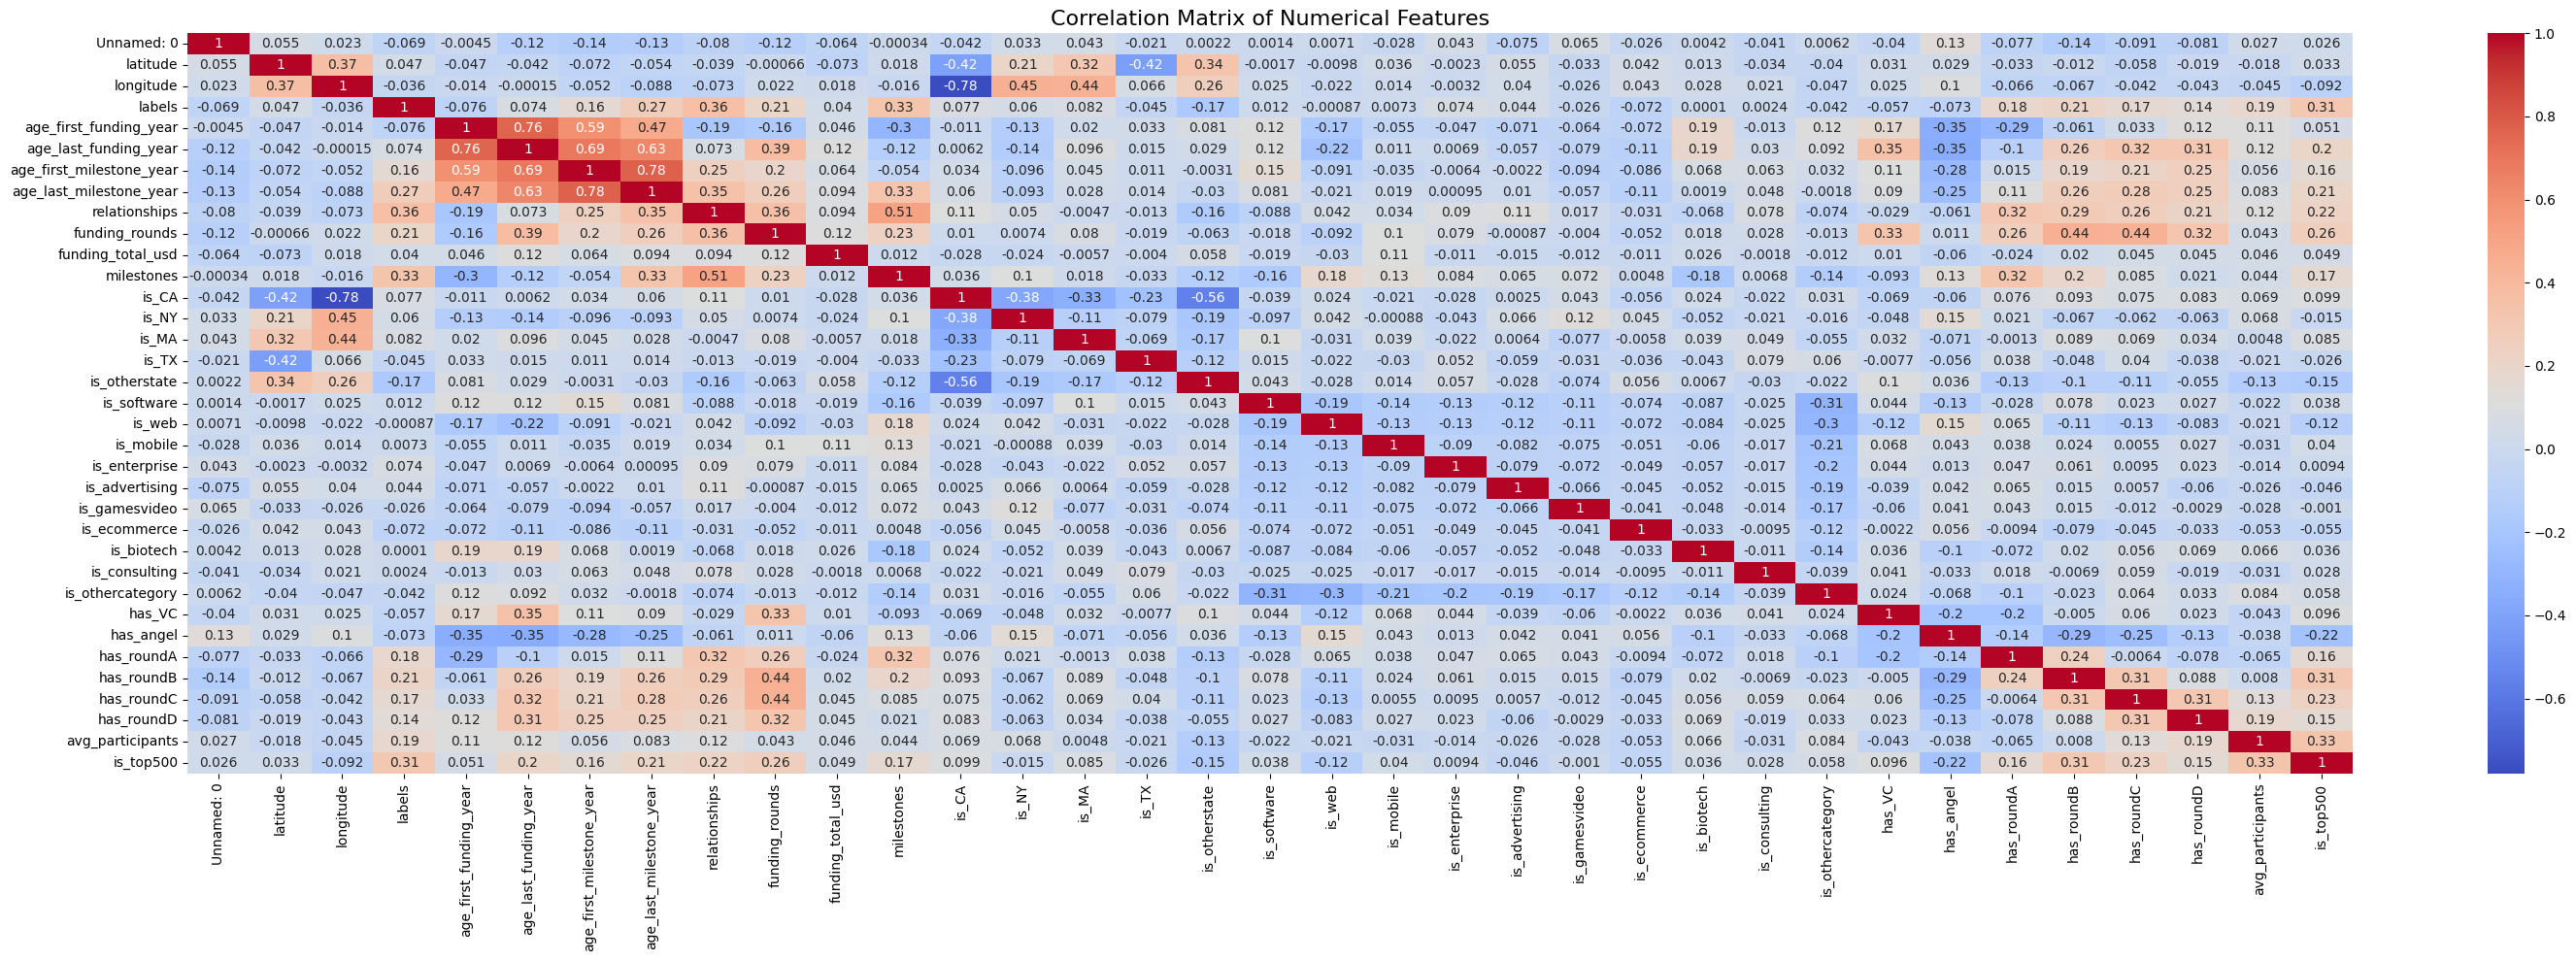

In [20]:
print("\n" + "="*50)
print("STEP 10: DETAILED CORRELATION ANALYSIS")
print("="*50)

# Create correlation matrix for numerical features
fig, ax = plt.subplots(figsize=(30,10))
corr = data.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


STEP 11: FEATURE IMPORTANCE & TARGET RELATIONSHIPS
🎯 Target Distribution by Key Features:

📊 Success Rate by Category:
status          acquired     closed
category_code                      
advertising    72.580645  27.419355
analytics      84.210526  15.789474
automotive     50.000000  50.000000
biotech        64.705882  35.294118
cleantech      43.478261  56.521739
consulting     66.666667  33.333333
ecommerce      44.000000  56.000000
education      75.000000  25.000000
enterprise     76.712329  23.287671
fashion        62.500000  37.500000

🗺️ Success Rate by State (Top 10):
status       acquired      closed
state_code                       
AR           0.000000  100.000000
AZ          50.000000   50.000000
CA          68.032787   31.967213
CO          73.684211   26.315789
CT           0.000000  100.000000
DC          50.000000   50.000000
FL          33.333333   66.666667
GA          54.545455   45.454545
ID           0.000000  100.000000
IL          50.000000   50.000000


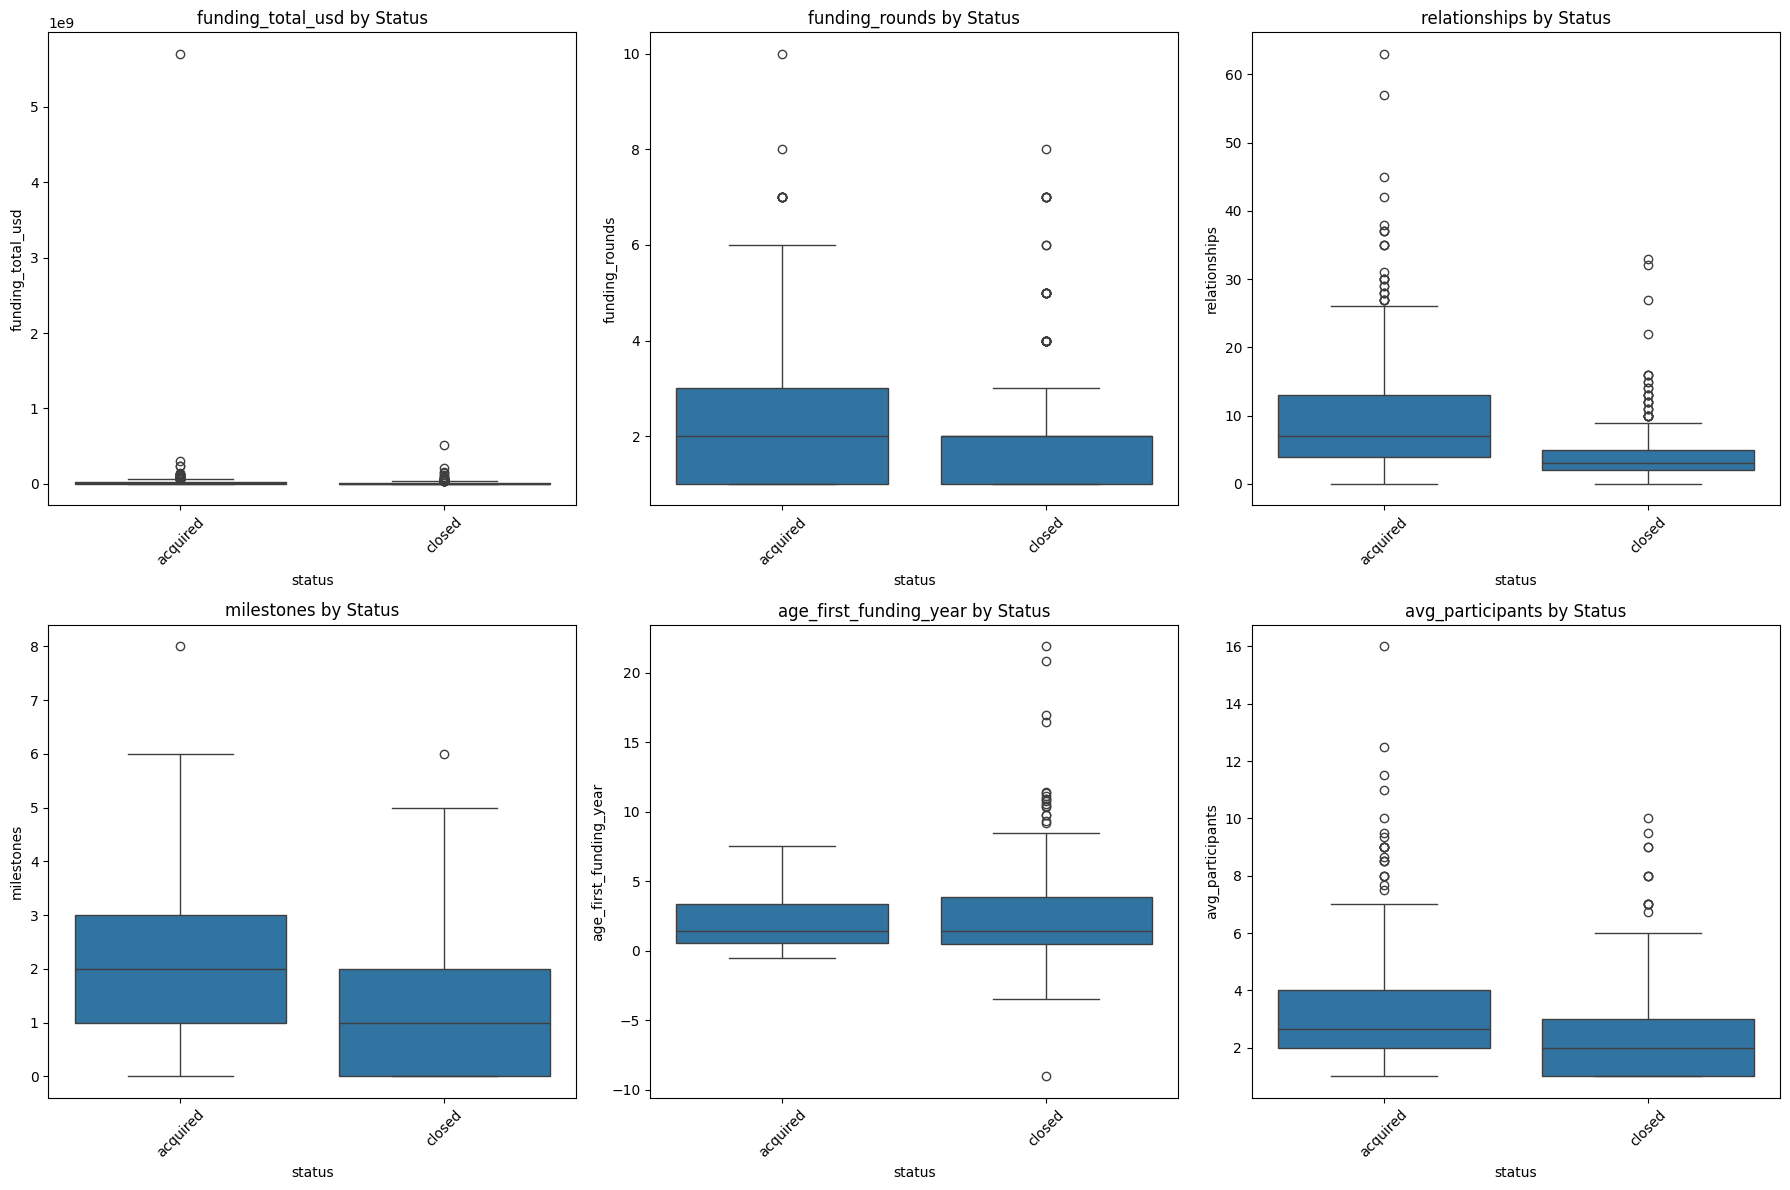


🎯 Top Features Correlated with Target:
labels                      1.000000
relationships               0.360434
milestones                  0.328260
is_top500                   0.310652
age_last_milestone_year     0.265871
has_roundB                  0.208257
funding_rounds              0.206049
avg_participants            0.185992
has_roundA                  0.184307
is_otherstate               0.169067
has_roundC                  0.165902
age_first_milestone_year    0.162279
has_roundD                  0.139940
is_MA                       0.081735
is_CA                       0.077217
Name: labels, dtype: float64


In [26]:
print("\n" + "="*50)
print("STEP 11: FEATURE IMPORTANCE & TARGET RELATIONSHIPS")
print("="*50)

# Analyze target distribution by key categorical features
print("🎯 Target Distribution by Key Features:")

# Status vs Category
if 'category_code' in data.columns and 'status' in data.columns:
    print("\n📊 Success Rate by Category:")
    category_success = pd.crosstab(data['category_code'], data['status'], normalize='index') * 100
    print(category_success.head(10))

# Status vs State
if 'state_code' in data.columns:
    print("\n🗺️ Success Rate by State (Top 10):")
    state_success = pd.crosstab(data['state_code'], data['status'], normalize='index') * 100
    print(state_success.head(10))

# Box plots for key numerical features vs target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

key_features = ['funding_total_usd', 'funding_rounds', 'relationships', 
               'milestones', 'age_first_funding_year', 'avg_participants']

for i, feature in enumerate(key_features):
    if feature in data.columns and i < 6:
        sns.boxplot(data=data, x='status', y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} by Status')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


if 'labels' in data.columns:
    print("\n🎯 Top Features Correlated with Target:")
    target_corr = data.select_dtypes(include=[np.number]).corr()['labels'].abs().sort_values(ascending=False)
    print(target_corr.head(15))


In [46]:
# Make sure dataframe is named 'data' for consistency with guide
data = df.copy()

# Also create founded_year column if it doesn't exist
if 'founded_at' in data.columns:
    data['founded_year'] = pd.to_datetime(data['founded_at']).dt.year.astype(str)

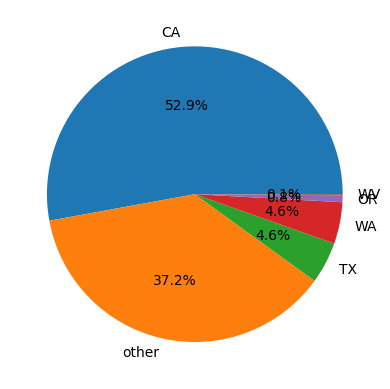

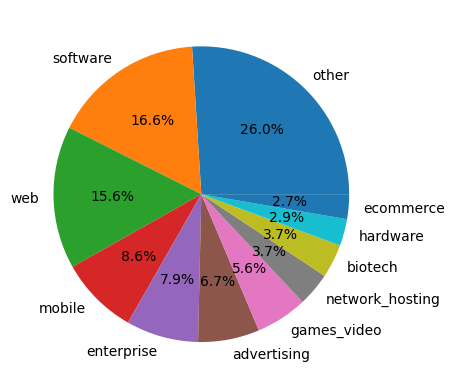

In [49]:
# Image 1 - State data processing
data['state'] = 'other'
data.loc[(data['state_code'] == 'CA'), 'state'] = 'CA'
data.loc[(data['state_code'] == 'WV'), 'state'] = 'WV'
data.loc[(data['state_code'] == 'WA'), 'state'] = 'WA'
data.loc[(data['state_code'] == 'TX'), 'state'] = 'TX'
data.loc[(data['state_code'] == 'OR'), 'state'] = 'OR'

state_count = data['state'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.show()

# Image 2 - Category data processing
data['category'] = 'other'
data.loc[(data['category_code'] == 'software'), 'category'] = 'software'
data.loc[(data['category_code'] == 'web'), 'category'] = 'web'
data.loc[(data['category_code'] == 'mobile'), 'category'] = 'mobile'
data.loc[(data['category_code'] == 'enterprise'), 'category'] = 'enterprise'
data.loc[(data['category_code'] == 'advertising'), 'category'] = 'advertising'
data.loc[(data['category_code'] == 'games_video'), 'category'] = 'games_video'
data.loc[(data['category_code'] == 'ecommerce'), 'category'] = 'ecommerce'
data.loc[(data['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
data.loc[(data['category_code'] == 'biotech'), 'category'] = 'biotech'
data.loc[(data['category_code'] == 'hardware'), 'category'] = 'hardware'

category_count = data['category'].value_counts()
plt.pie(category_count, labels = category_count.index, autopct = '%1.1f%%')
plt.show()


STEP 12: FUNDING ANALYSIS OVER TIME


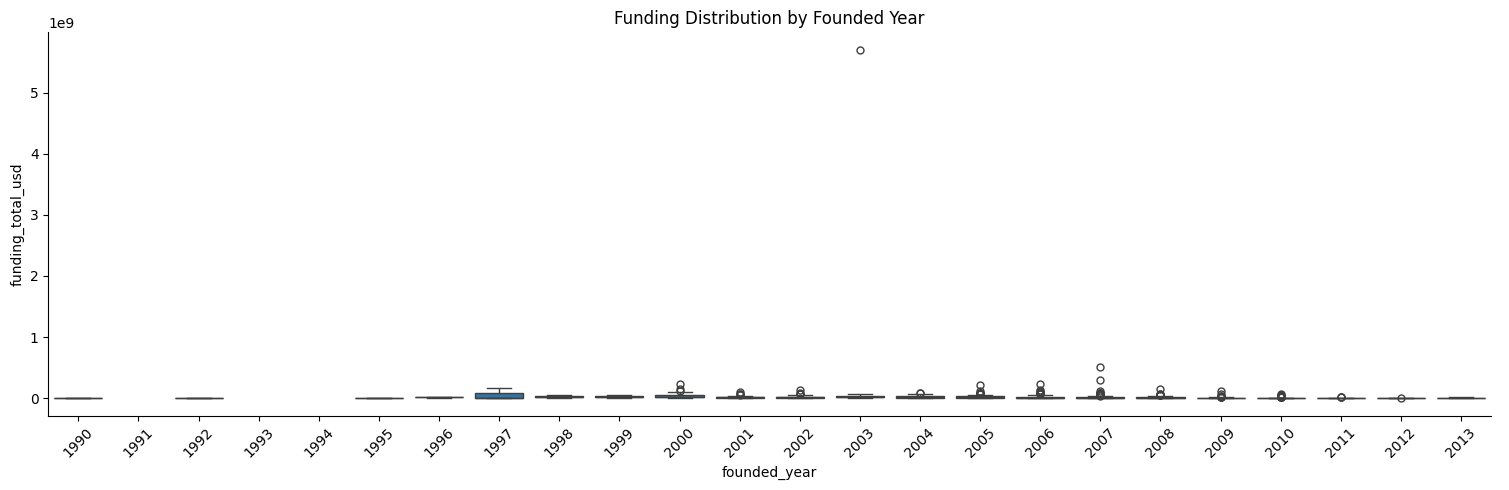

In [36]:
print("\n" + "="*50)
print("STEP 12: FUNDING ANALYSIS OVER TIME")
print("="*50)

# Create funding vs founded year analysis
sns.catplot(data=data, x="founded_year", y="funding_total_usd", 
           kind="box", height=5, aspect=3, 
           order=['1990','1991','1992','1993','1994','1995',
                  '1996','1997','1998','1999','2000',
                  '2001','2002','2003','2004','2005',
                  '2006','2007','2008','2009','2010',
                  '2011','2012','2013'])
plt.title('Funding Distribution by Founded Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


STEP 12: FUNDING ROUNDS ANALYSIS


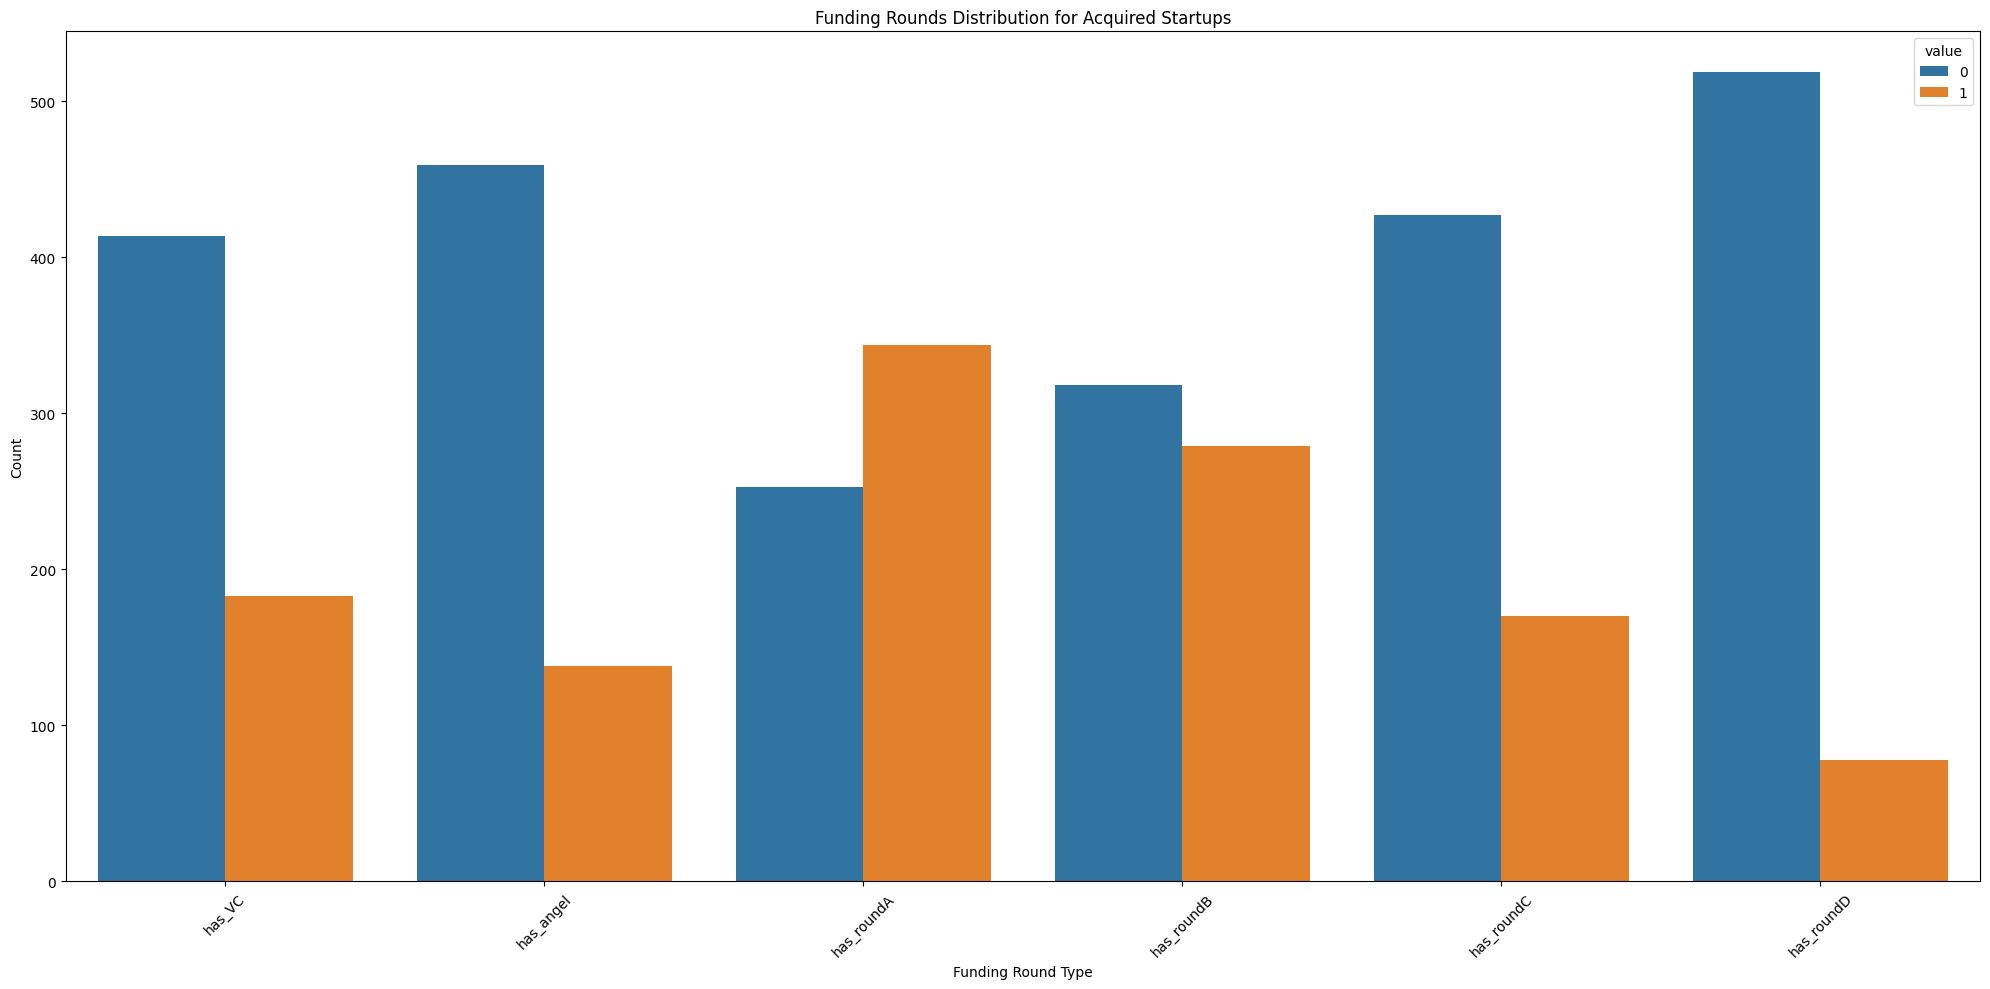

In [29]:
print("\n" + "="*50)
print("STEP 13: FUNDING ROUNDS ANALYSIS")
print("="*50)

# Analyze different funding rounds
fig, ax = plt.subplots(figsize=(20,10))
d = data.loc[data['status'] == 'acquired']
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]
sns.countplot(data = pd.melt(f), x = 'variable', hue = 'value')
plt.title('Funding Rounds Distribution for Acquired Startups')
plt.xlabel('Funding Round Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


STEP 13: CATEGORY-WISE STARTUP EVOLUTION


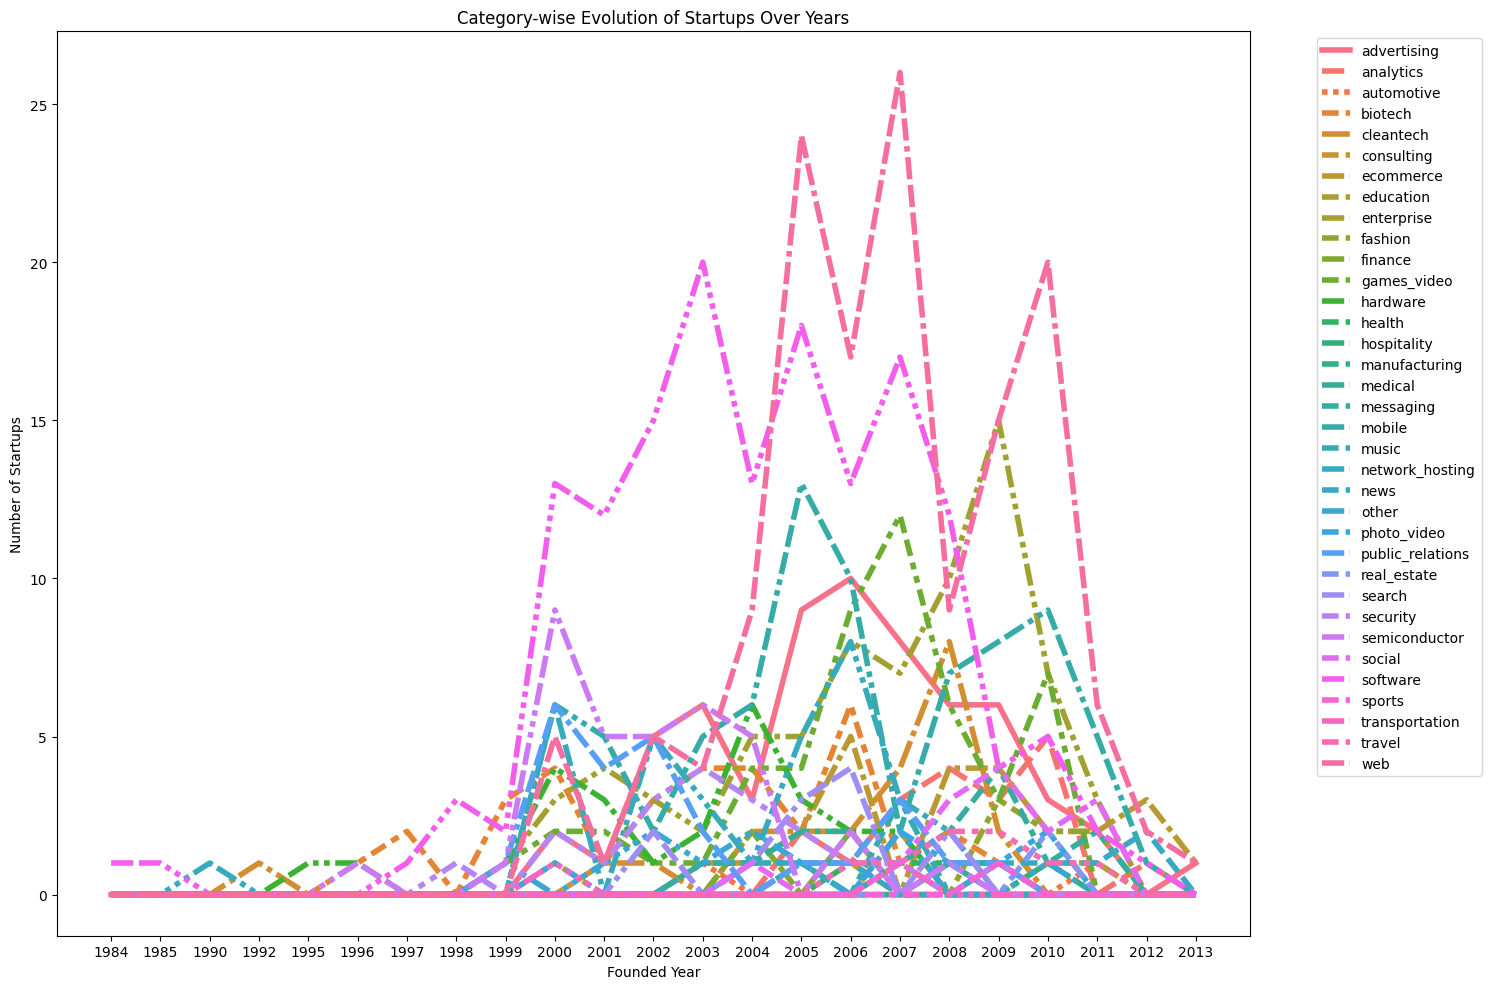

In [47]:
print("\n" + "="*50)
print("STEP 13: CATEGORY-WISE STARTUP EVOLUTION")
print("="*50)

# Create crosstab for category vs founded year
cat_year = pd.crosstab(index = data['founded_year'], columns = data['category_code'])

fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data = cat_year, lw = 4)
plt.title('Category-wise Evolution of Startups Over Years')
plt.xlabel('Founded Year')
plt.ylabel('Number of Startups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


STEP 14: STATUS PROPORTION ANALYSIS BY CATEGORY


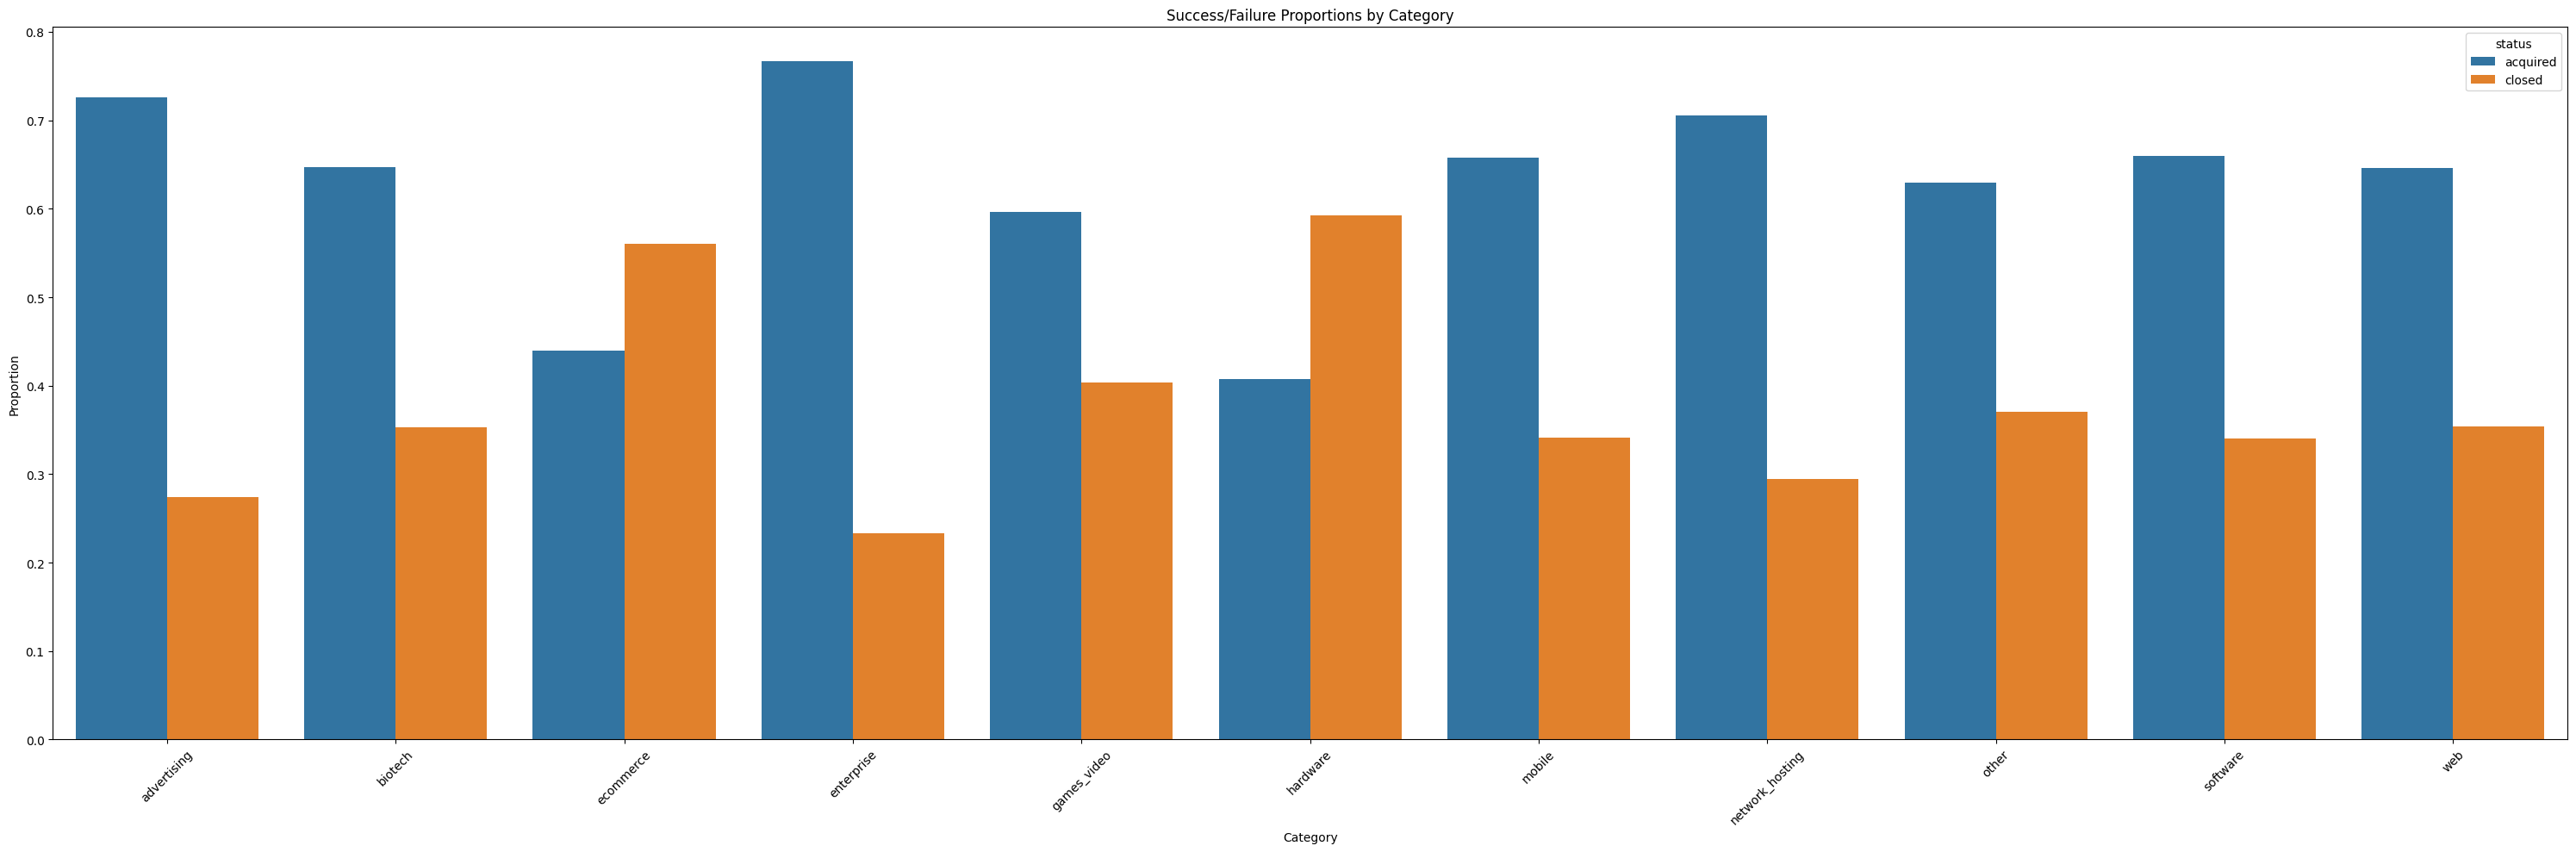

In [52]:
print("\n" + "="*50)
print("STEP 14: STATUS PROPORTION ANALYSIS BY CATEGORY")
print("="*50)

# Calculate proportions by category
# Calculate proportions by category
fig, ax = plt.subplots(figsize=(30,10))
prop_df = data.groupby(['category', 'status']).size().reset_index(name='counts')

# Fix: Use transform instead of apply to get proper alignment
prop_df['proportions'] = prop_df.groupby('category')['counts'].transform(lambda x: x / x.sum())

sns.barplot(data=prop_df, x='category', y='proportions', hue='status')
plt.title('Success/Failure Proportions by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


STEP 15: GEOGRAPHIC SUCCESS ANALYSIS


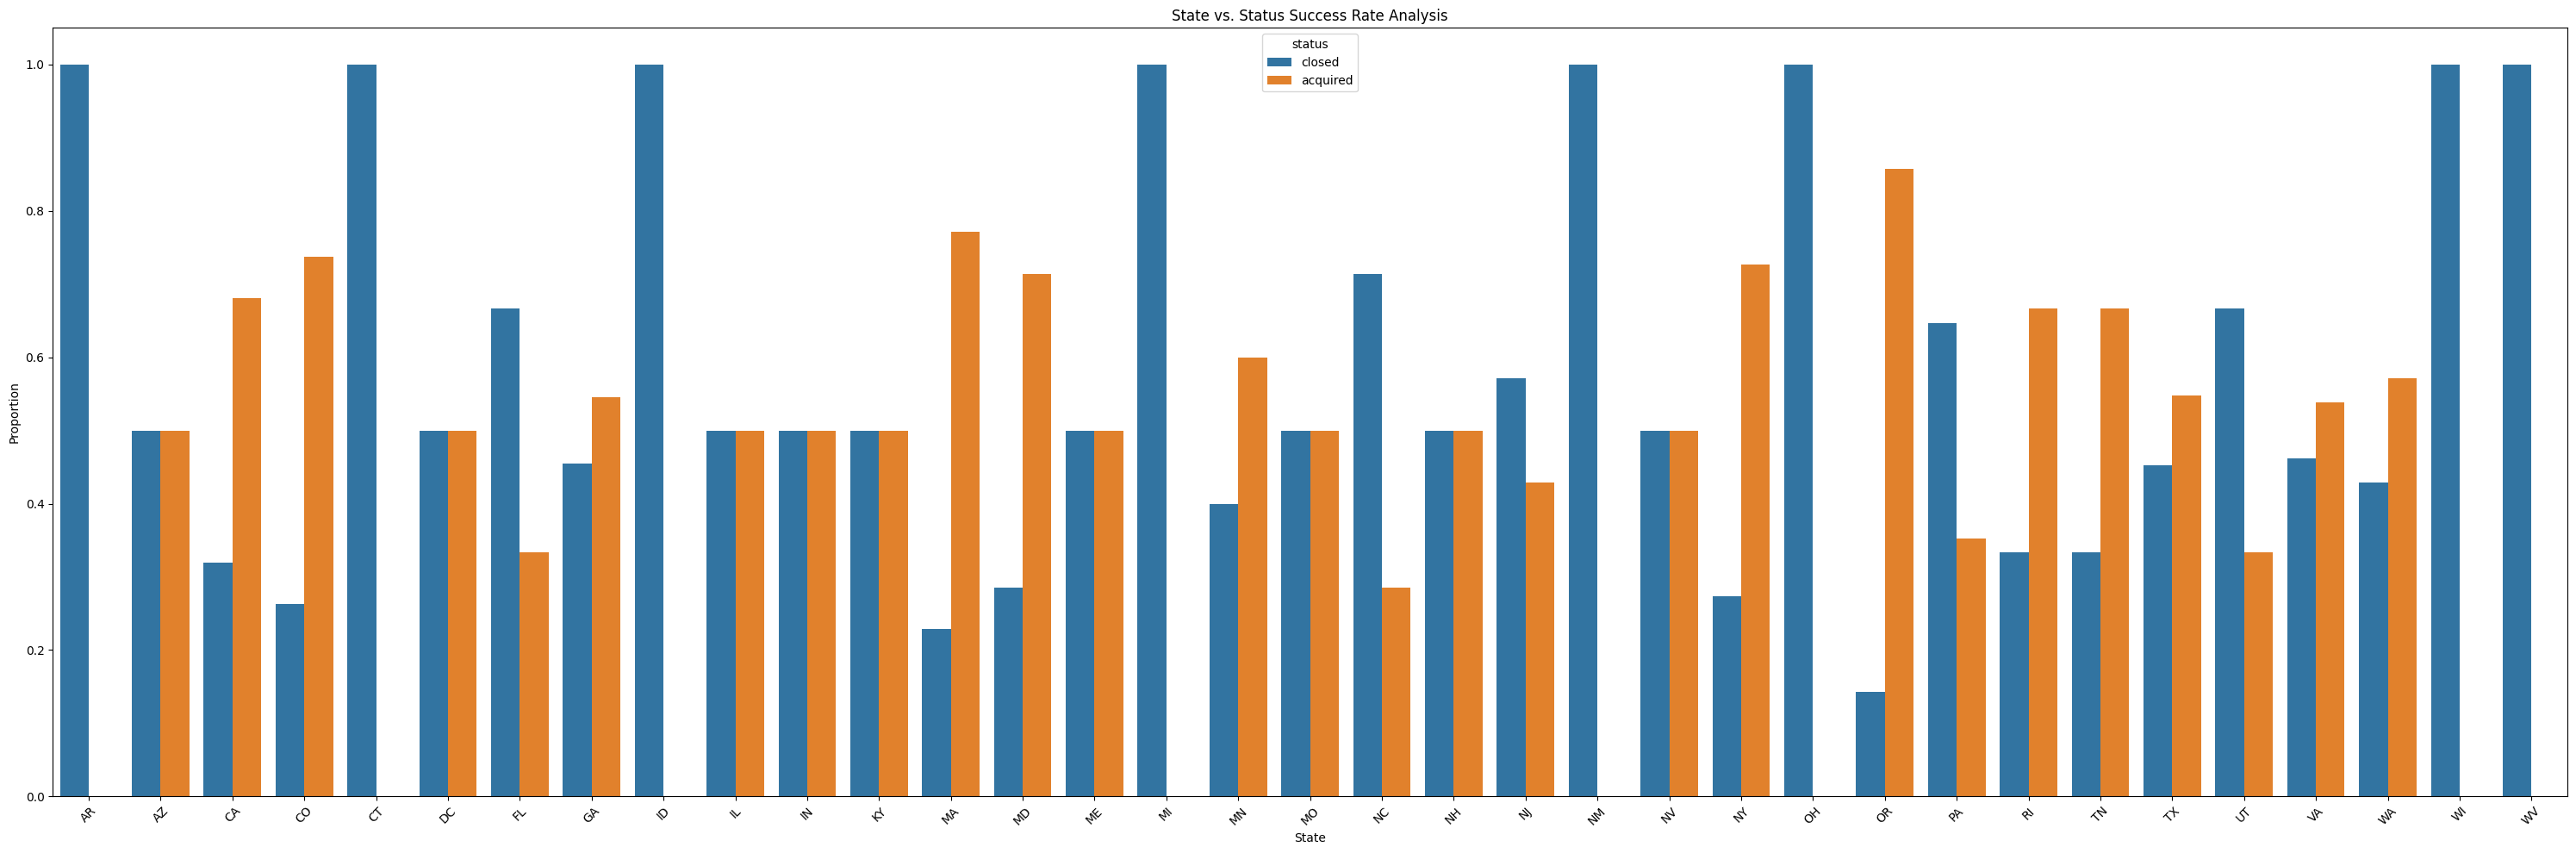

In [54]:
# Step 15: State-wise Status Analysis (From your guide - Image 6)
print("\n" + "="*50)
print("STEP 15: GEOGRAPHIC SUCCESS ANALYSIS")
print("="*50)

# State vs Status analysis
fig, ax = plt.subplots(figsize=(30,10))
prop_df = data.groupby(['state_code','status']).size().reset_index(name='counts')
prop_df['proportions'] = prop_df.groupby('state_code')['counts'].transform(lambda x: x/float(x.sum()))
sns.barplot(data = prop_df, x = 'state_code', y = 'proportions', hue = 'status')
plt.title('State vs. Status Success Rate Analysis')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Additional Analysis: Key Insights Summary
print("\n" + "="*50)
print("KEY INSIGHTS SUMMARY")
print("="*50)

# Success rate by category
print("📊 SUCCESS RATE BY CATEGORY:")
success_by_category = data.groupby('category_code')['status'].apply(
    lambda x: (x == 'acquired').sum() / len(x) * 100
).sort_values(ascending=False)
print(success_by_category.head(10))

# Success rate by state
print("\n🗺️ SUCCESS RATE BY STATE (Top 10):")
success_by_state = data.groupby('state_code')['status'].apply(
    lambda x: (x == 'acquired').sum() / len(x) * 100
).sort_values(ascending=False)
print(success_by_state.head(10))

# Funding statistics by status
print("\n💰 FUNDING STATISTICS BY STATUS:")
funding_stats = data.groupby('status')['funding_total_usd'].agg(['mean', 'median', 'count'])
print(funding_stats)

# Age statistics by status
print("\n⏰ AGE STATISTICS BY STATUS:")
if 'age_first_funding_year' in data.columns:
    age_stats = data.groupby('status')['age_first_funding_year'].agg(['mean', 'median', 'count'])
    print(age_stats)

print("\n✅ Advanced EDA completed successfully!")
print("🚀 Ready for Data Preprocessing and Model Building!")


KEY INSIGHTS SUMMARY
📊 SUCCESS RATE BY CATEGORY:
category_code
music             100.000000
transportation    100.000000
sports            100.000000
hospitality       100.000000
health            100.000000
travel             87.500000
news               87.500000
analytics          84.210526
security           78.947368
enterprise         76.712329
Name: status, dtype: float64

🗺️ SUCCESS RATE BY STATE (Top 10):
state_code
OR    85.714286
MA    77.108434
CO    73.684211
NY    72.641509
MD    71.428571
CA    68.032787
RI    66.666667
TN    66.666667
MN    60.000000
WA    57.142857
Name: status, dtype: float64

💰 FUNDING STATISTICS BY STATUS:
                  mean      median  count
status                                   
acquired  3.104662e+07  12700000.0    597
closed    1.511532e+07   5000000.0    326

⏰ AGE STATISTICS BY STATUS:
              mean  median  count
status                           
acquired  2.095389  1.4466    597
closed    2.492452  1.4384    326

✅ Advanced EDA

In [55]:
print("\n" + "="*60)
print("DATA PREPROCESSING STEPS")
print("="*60)

# Step 1: Check state_code columns consistency (From your guide - Image 1)
print("\n" + "="*50)
print("STEP 1: STATE CODE COLUMNS ANALYSIS")
print("="*50)

# Check if state_code and state_code.1 are equal
print("🔍 Checking if state_code equals state_code.1:")
print(data['state_code'].equals(data['state_code.1']))

# Find rows where state_code != state_code.1
df = data.loc[data['state_code'] != data['state_code.1']]
df_subset = df[['state_code', 'state_code.1']]

print(f"\n📊 Rows where state_code != state_code.1: {len(df)}")
if len(df) > 0:
    print("Sample rows with differences:")
    print(df[['state_code', 'city', 'labels', 'founded_at', 'closed_at', 
             'first_funding_at', 'last_funding_at', 'age_first_funding_year', 
             'age_last_funding_year']].head())


DATA PREPROCESSING STEPS

STEP 1: STATE CODE COLUMNS ANALYSIS
🔍 Checking if state_code equals state_code.1:
False

📊 Rows where state_code != state_code.1: 1
Sample rows with differences:
    state_code        city  labels founded_at closed_at first_funding_at  \
515         CA  Menlo Park       0   1/1/2005  9/1/2010         3/1/2007   

    last_funding_at  age_first_funding_year  age_last_funding_year  
515       4/15/2008                  2.1616                 3.2877  


In [61]:
# Step 2: State code distribution and proportion analysis (From your guide - Image 2)
print("\n" + "="*50)
print("STEP 2: STATE CODE DISTRIBUTION ANALYSIS")
print("="*50)

# Calculate state distribution - FIXED VERSION
state = data['state_code'].value_counts().to_frame()
state.columns = ['count']  # Rename the count column first
state['proportion'] = (state['count']/state['count'].sum())*100
state = state.reset_index()
state.columns = ['state_code', 'count', 'proportion']

print("📊 State Code Distribution:")
print(state.head(20))

# Identify top 5 states
top_5_states = state.head(5)['state_code'].tolist()
print(f"\n🏆 Top 5 States: {top_5_states}")
print(f"📈 Coverage of top 5 states: {state.head(5)['proportion'].sum():.2f}%")


STEP 2: STATE CODE DISTRIBUTION ANALYSIS
📊 State Code Distribution:
   state_code  count  proportion
0          CA    488   52.871073
1          NY    106   11.484290
2          MA     83    8.992416
3          TX     42    4.550379
4          WA     42    4.550379
5          CO     19    2.058505
6          IL     18    1.950163
7          PA     17    1.841820
8          VA     13    1.408451
9          GA     11    1.191766
10         NC      7    0.758397
11         OR      7    0.758397
12         NJ      7    0.758397
13         MD      7    0.758397
14         FL      6    0.650054
15         OH      6    0.650054
16         MN      5    0.541712
17         DC      4    0.433369
18         CT      4    0.433369
19         TN      3    0.325027

🏆 Top 5 States: ['CA', 'NY', 'MA', 'TX', 'WA']
📈 Coverage of top 5 states: 82.45%


In [57]:
print("\n" + "="*50)
print("STEP 3: REDUCING STATE CATEGORIES")
print("="*50)

# Create new state_category column
data['state_category'] = data['state_code'].apply(
    lambda x: x if x in ['CA', 'NY', 'MA', 'TX', 'WA'] else 'Other'
)

print("🔄 State categories after reduction:")
state_reduced = data['state_category'].value_counts()
print(state_reduced)

print(f"\n📊 Percentage coverage:")
for state_cat in state_reduced.index:
    percentage = (state_reduced[state_cat] / len(data)) * 100
    print(f"  {state_cat}: {percentage:.2f}%")


STEP 3: REDUCING STATE CATEGORIES
🔄 State categories after reduction:
state_category
CA       488
Other    162
NY       106
MA        83
TX        42
WA        42
Name: count, dtype: int64

📊 Percentage coverage:
  CA: 52.87%
  Other: 17.55%
  NY: 11.48%
  MA: 8.99%
  TX: 4.55%
  WA: 4.55%


In [58]:
# Step 4: Drop irrelevant columns (From your guide - Image 3)
print("\n" + "="*50)
print("STEP 4: DROPPING IRRELEVANT COLUMNS")
print("="*50)

# Columns to drop as per guide
columns_to_drop = ['category_code', 'is_software', 'is_web', 'is_mobile', 
                   'is_enterprise', 'is_advertising', 'is_gamesvideo', 
                   'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory']

# Check which columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
print(f"📋 Columns to drop: {len(existing_columns_to_drop)}")
for col in existing_columns_to_drop:
    print(f"  ✅ {col}")

# Drop the columns
data = data.drop(existing_columns_to_drop, axis=1)
print(f"\n🗑️ Dropped {len(existing_columns_to_drop)} columns")
print(f"📊 Remaining columns: {data.shape[1]}")



STEP 4: DROPPING IRRELEVANT COLUMNS
📋 Columns to drop: 11
  ✅ category_code
  ✅ is_software
  ✅ is_web
  ✅ is_mobile
  ✅ is_enterprise
  ✅ is_advertising
  ✅ is_gamesvideo
  ✅ is_ecommerce
  ✅ is_biotech
  ✅ is_consulting
  ✅ is_othercategory

🗑️ Dropped 11 columns
📊 Remaining columns: 42


In [59]:
# Step 5: Additional preprocessing steps
print("\n" + "="*50)
print("STEP 5: ADDITIONAL PREPROCESSING")
print("="*50)

# Drop duplicate state_code column
if 'state_code.1' in data.columns:
    data = data.drop(['state_code.1'], axis=1)
    print("✅ Dropped duplicate state_code.1 column")

# Handle missing values
print("\n🔍 Missing values after preprocessing:")
missing_values = data.isnull().sum()
missing_with_values = missing_values[missing_values > 0]
if len(missing_with_values) > 0:
    print(missing_with_values)
else:
    print("No missing values found!")

# Remove unnecessary identifier columns
identifier_cols = ['Unnamed: 0', 'id', 'object_id', 'Unnamed: 6']
existing_id_cols = [col for col in identifier_cols if col in data.columns]
if existing_id_cols:
    data = data.drop(existing_id_cols, axis=1)
    print(f"🗑️ Dropped identifier columns: {existing_id_cols}")


STEP 5: ADDITIONAL PREPROCESSING
✅ Dropped duplicate state_code.1 column

🔍 Missing values after preprocessing:
Unnamed: 6                  493
closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
dtype: int64
🗑️ Dropped identifier columns: ['Unnamed: 0', 'id', 'object_id', 'Unnamed: 6']


In [60]:
# Step 5: Additional preprocessing steps
print("\n" + "="*50)
print("STEP 5: ADDITIONAL PREPROCESSING")
print("="*50)

# Drop duplicate state_code column
if 'state_code.1' in data.columns:
    data = data.drop(['state_code.1'], axis=1)
    print("✅ Dropped duplicate state_code.1 column")

# Handle missing values
print("\n🔍 Missing values after preprocessing:")
missing_values = data.isnull().sum()
missing_with_values = missing_values[missing_values > 0]
if len(missing_with_values) > 0:
    print(missing_with_values)
else:
    print("No missing values found!")

# Remove unnecessary identifier columns
identifier_cols = ['Unnamed: 0', 'id', 'object_id', 'Unnamed: 6']
existing_id_cols = [col for col in identifier_cols if col in data.columns]
if existing_id_cols:
    data = data.drop(existing_id_cols, axis=1)
    print(f"🗑️ Dropped identifier columns: {existing_id_cols}")

# Step 6: Feature Engineering
print("\n" + "="*50)
print("STEP 6: FEATURE ENGINEERING")
print("="*50)

# Create binary target variable if needed
if 'status' in data.columns:
    data['is_success'] = (data['status'] == 'acquired').astype(int)
    print("✅ Created binary target variable 'is_success'")
    print(f"📊 Success distribution: {data['is_success'].value_counts().to_dict()}")

# Create age-related features
if 'founded_at' in data.columns:
    data['founded_year'] = pd.to_datetime(data['founded_at'], errors='coerce').dt.year
    data['company_age'] = 2023 - data['founded_year']  # Assuming current year is 2023
    print("✅ Created company age features")

# Create funding efficiency metrics
if 'funding_total_usd' in data.columns and 'funding_rounds' in data.columns:
    data['funding_per_round'] = data['funding_total_usd'] / (data['funding_rounds'] + 1)  # +1 to avoid division by zero
    print("✅ Created funding efficiency metrics")

# Step 7: Data types optimization
print("\n" + "="*50)
print("STEP 7: DATA TYPES OPTIMIZATION")
print("="*50)

# Convert binary columns to int8 for memory efficiency
binary_columns = ['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 
                 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 
                 'has_roundC', 'has_roundD', 'is_top500']

for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].astype('int8')

print("✅ Optimized data types for binary columns")

# Final dataset summary
print("\n" + "="*50)
print("PREPROCESSING SUMMARY")
print("="*50)

print(f"📊 Final dataset shape: {data.shape}")
print(f"📈 Features: {data.shape[1]}")
print(f"📉 Samples: {data.shape[0]}")

print(f"\n📋 Final columns:")
for i, col in enumerate(data.columns.tolist(), 1):
    print(f"  {i:2d}. {col}")

print(f"\n💾 Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n✅ Data preprocessing completed successfully!")
print("🚀 Ready for model training!")


STEP 5: ADDITIONAL PREPROCESSING

🔍 Missing values after preprocessing:
closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
dtype: int64

STEP 6: FEATURE ENGINEERING
✅ Created binary target variable 'is_success'
📊 Success distribution: {1: 597, 0: 326}
✅ Created company age features
✅ Created funding efficiency metrics

STEP 7: DATA TYPES OPTIMIZATION
✅ Optimized data types for binary columns

PREPROCESSING SUMMARY
📊 Final dataset shape: (923, 40)
📈 Features: 40
📉 Samples: 923

📋 Final columns:
   1. state_code
   2. latitude
   3. longitude
   4. zip_code
   5. city
   6. name
   7. labels
   8. founded_at
   9. closed_at
  10. first_funding_at
  11. last_funding_at
  12. age_first_funding_year
  13. age_last_funding_year
  14. age_first_milestone_year
  15. age_last_milestone_year
  16. relationships
  17. funding_rounds
  18. funding_total_usd
  19. milestones
  20. is_CA
  21. is_NY
  22. is_MA
  23. is_TX
  24. is_otherstate
  25. has_V

In [62]:
# Startup Prediction - Train-Test Split
# Following the project guide instructions

print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Step 1: Prepare the target variable
print("\n" + "="*50)
print("STEP 1: PREPARING TARGET VARIABLE")
print("="*50)

# Check available target columns
print("🎯 Available target columns:")
target_options = ['status', 'labels', 'is_success']
for col in target_options:
    if col in data.columns:
        print(f"  ✅ {col}: {data[col].dtype}")
        if col == 'status':
            print(f"     Values: {data[col].unique()}")
        elif col in ['labels', 'is_success']:
            print(f"     Values: {data[col].unique()}")

# Choose target variable (using 'labels' as primary, 'status' as backup)
if 'labels' in data.columns:
    y = data['labels']
    target_col = 'labels'
    print(f"\n✅ Using '{target_col}' as target variable")
elif 'is_success' in data.columns:
    y = data['is_success']
    target_col = 'is_success'
    print(f"\n✅ Using '{target_col}' as target variable")
else:
    # Create binary target from status
    le = LabelEncoder()
    y = le.fit_transform(data['status'])
    target_col = 'status'
    print(f"\n✅ Using encoded '{target_col}' as target variable")
    print(f"📊 Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"🎯 Target distribution:")
print(pd.Series(y).value_counts())

# Step 2: Prepare feature matrix
print("\n" + "="*50)
print("STEP 2: PREPARING FEATURE MATRIX")
print("="*50)

# Define columns to exclude from features
columns_to_exclude = [
    'status',           # Target variable
    'labels',           # Target variable  
    'is_success',       # Target variable
    'name',             # Company name (not predictive)
    'city',             # Too many categories
    'founded_at',       # Date (we have derived features)
    'closed_at',        # Date (leakage - only available after outcome)
    'first_funding_at', # Date (we have derived features)
    'last_funding_at',  # Date (we have derived features)
    'zip_code',         # Too many categories
    'state_code',       # We have state_category instead
]

# Get feature columns
feature_columns = [col for col in data.columns if col not in columns_to_exclude]
print(f"📊 Total columns in dataset: {len(data.columns)}")
print(f"🗑️ Excluded columns: {len(columns_to_exclude)}")
print(f"📈 Feature columns: {len(feature_columns)}")

print(f"\n📋 Feature columns to be used:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {col}")

# Create feature matrix X
X = data[feature_columns].copy()

# Handle categorical variables
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"\n🔤 Categorical features found: {len(categorical_features)}")
for col in categorical_features:
    print(f"  - {col}: {X[col].nunique()} unique values")

# Encode categorical variables
if categorical_features:
    print(f"\n🔄 Encoding categorical variables...")
    for col in categorical_features:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        print(f"  ✅ Encoded {col}")

# Handle missing values
print(f"\n🔍 Checking for missing values...")
missing_counts = X.isnull().sum()
if missing_counts.sum() > 0:
    print("📊 Missing values found:")
    for col, count in missing_counts[missing_counts > 0].items():
        print(f"  - {col}: {count} missing values")
    
    # Fill missing values
    print("\n🔧 Filling missing values...")
    # Fill numerical columns with median
    numerical_cols = X.select_dtypes(include=[np.number]).columns
    X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
    
    # Fill categorical columns with mode
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = X[col].fillna(X[col].mode()[0])
    
    print("✅ Missing values filled")
else:
    print("✅ No missing values found")

print(f"\n📊 Final feature matrix shape: {X.shape}")

# Step 3: Train-Test Split
print("\n" + "="*50)
print("STEP 3: TRAIN-TEST SPLIT")
print("="*50)

# Split the data into training and testing sets
# 70% for training, 30% for testing, random_state=116 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,      # 30% for testing
    train_size=0.7,     # 70% for training  
    random_state=116,   # For reproducibility
    stratify=y          # Maintain target distribution
)

print("✅ Train-test split completed successfully!")
print(f"\n📊 Dataset split summary:")
print(f"  📈 Total samples: {len(X)}")
print(f"  🏋️ Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  🧪 Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"  📊 Features: {X.shape[1]}")

print(f"\n🎯 Target distribution in training set:")
train_target_dist = pd.Series(y_train).value_counts()
print(train_target_dist)
print(f"Training set proportions: {pd.Series(y_train).value_counts(normalize=True)*100}")

print(f"\n🎯 Target distribution in testing set:")
test_target_dist = pd.Series(y_test).value_counts()
print(test_target_dist)
print(f"Testing set proportions: {pd.Series(y_test).value_counts(normalize=True)*100}")

# Step 4: Feature information summary
print(f"\n📋 Feature summary:")
print(f"  🔢 Numerical features: {len(X.select_dtypes(include=[np.number]).columns)}")
print(f"  🔤 Categorical features: {len(categorical_features)}")
print(f"  📊 Total features: {X.shape[1]}")

# Display feature types
print(f"\n📊 Feature data types:")
print(X.dtypes.value_counts())

print(f"\n✅ Data is ready for model training!")
print(f"🚀 Next step: Train machine learning models!")

# Optional: Display first few rows of training data
print(f"\n👀 First 3 rows of training features:")
print(X_train.head(3))
print(f"\n👀 First 10 training targets:")
print(y_train[:10])


TRAIN-TEST SPLIT

STEP 1: PREPARING TARGET VARIABLE
🎯 Available target columns:
  ✅ status: object
     Values: ['acquired' 'closed']
  ✅ labels: int64
     Values: [1 0]
  ✅ is_success: int64
     Values: [1 0]

✅ Using 'labels' as target variable
🎯 Target distribution:
labels
1    597
0    326
Name: count, dtype: int64

STEP 2: PREPARING FEATURE MATRIX
📊 Total columns in dataset: 40
🗑️ Excluded columns: 11
📈 Feature columns: 29

📋 Feature columns to be used:
   1. latitude
   2. longitude
   3. age_first_funding_year
   4. age_last_funding_year
   5. age_first_milestone_year
   6. age_last_milestone_year
   7. relationships
   8. funding_rounds
   9. funding_total_usd
  10. milestones
  11. is_CA
  12. is_NY
  13. is_MA
  14. is_TX
  15. is_otherstate
  16. has_VC
  17. has_angel
  18. has_roundA
  19. has_roundB
  20. has_roundC
  21. has_roundD
  22. avg_participants
  23. is_top500
  24. founded_year
  25. state
  26. category
  27. state_category
  28. company_age
  29. funding_

In [63]:
# Startup Prediction - Model Training with GridSearchCV
# Following the project guide instructions

print("\n" + "="*60)
print("MODEL TRAINING WITH HYPERPARAMETER TUNING")
print("="*60)

# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import numpy as np
import pandas as pd

# Step 1: Define Random Forest with Parameter Grid (From your guide - Image 1)
print("\n" + "="*50)
print("STEP 1: RANDOM FOREST HYPERPARAMETER TUNING")
print("="*50)

# Define the Random Forest classifier
rf = RandomForestClassifier()

# Define parameter grid for GridSearch (as per your guide)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

print("🔧 Parameter grid defined:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# Perform GridSearchCV with 5-fold cross-validation
print("\n🔍 Performing GridSearchCV...")
print("⚙️ Configuration:")
print("  - Cross-validation folds: 5")
print("  - Parallel jobs: -1")
print("  - Scoring: accuracy")

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=False,
    scoring='accuracy'
)

# Fit the grid search to training data
print("\n🏋️ Training models with different parameter combinations...")
grid_search.fit(X_train, y_train)

# Print best parameters found
print("\n✅ GridSearchCV completed!")
print('🏆 Best parameters:', grid_search.best_params_)
print(f'📊 Best cross-validation score: {grid_search.best_score_:.4f}')

# Step 2: Define Scaling Function (From your guide)
print("\n" + "="*50)
print("STEP 2: FEATURE SCALING FUNCTION")
print("="*50)

def _scale(X_train, X_test, features):
    """
    Apply StandardScaler to standardize numerical features.
    
    Parameters:
    X_train: Training data
    X_test: Test data  
    features: List of features to scale
    
    Returns:
    X_train_scaled, X_test_scaled: Scaled training and test data
    """
    scaler = StandardScaler()
    
    # Fit scaler on training data and transform
    X_train_scaled = X_train.copy()
    X_train_scaled[features] = scaler.fit_transform(X_train[features])
    
    # Transform test data using the fitted scaler
    X_test_scaled = X_test.copy()
    X_test_scaled[features] = scaler.transform(X_test[features])
    
    return X_train_scaled, X_test_scaled, scaler

# Identify numerical features for scaling
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"🔢 Numerical features to scale ({len(numerical_features)}):")
for feature in numerical_features:
    print(f"  - {feature}")

# Apply scaling
print("\n⚖️ Applying StandardScaler...")
X_train_scaled, X_test_scaled, scaler = _scale(X_train, X_test, numerical_features)
print("✅ Feature scaling completed!")

# Step 3: Train Final Model and Evaluate (From your guide - Image 2)
print("\n" + "="*50)
print("STEP 3: FINAL MODEL TRAINING AND EVALUATION")
print("="*50)

# Train the best Random Forest model
print("🚀 Training final model with best parameters...")
rf_best = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    bootstrap=grid_search.best_params_['bootstrap'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

# Fit the model
rf_best.fit(X_train_scaled, y_train)

# Make predictions
print("🔮 Making predictions...")
y_pred_rf = rf_best.predict(X_test_scaled)

# Generate classification report (as shown in your guide)
print("\n📊 Classification Report:")
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

# Additional evaluation metrics
print("📈 Additional Metrics:")
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"🎯 Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

# Feature Importance Analysis
print("\n🔍 Top 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# Step 4: Model Validation on Training Set
print("\n" + "="*50)
print("STEP 4: MODEL VALIDATION")
print("="*50)

# Training set performance
y_train_pred = rf_best.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("📊 Model Performance Summary:")
print(f"  🏋️ Training Accuracy: {train_accuracy:.4f}")
print(f"  🧪 Testing Accuracy: {accuracy:.4f}")
print(f"  📉 Difference: {abs(train_accuracy - accuracy):.4f}")

if abs(train_accuracy - accuracy) < 0.05:
    print("  ✅ Good model - Low overfitting")
elif abs(train_accuracy - accuracy) < 0.10:
    print("  ⚠️ Moderate overfitting")
else:
    print("  ❌ High overfitting - Consider regularization")

# Step 5: Save the Model (For Flask Integration)
print("\n" + "="*50)
print("STEP 5: SAVING THE MODEL")
print("="*50)

# Save the trained model
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_best, file)

print(f"💾 Model saved as '{model_filename}'")

# Save the scaler (needed for prediction)
scaler_filename = 'feature_scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"💾 Scaler saved as '{scaler_filename}'")

# Save feature names (needed for prediction)
feature_names = X_train_scaled.columns.tolist()
features_filename = 'feature_names.pkl'
with open(features_filename, 'wb') as file:
    pickle.dump(feature_names, file)

print(f"💾 Feature names saved as '{features_filename}'")

# Step 6: Model Summary
print("\n" + "="*50)
print("MODEL TRAINING SUMMARY")
print("="*50)

print(f"🤖 Best Model Configuration:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Performance Metrics:")
print(f"  🎯 Test Accuracy: {accuracy:.4f}")
print(f"  🏋️ Train Accuracy: {train_accuracy:.4f}")
print(f"  📈 CV Score: {grid_search.best_score_:.4f}")

print(f"\n💾 Saved Files:")
print(f"  📁 {model_filename}")
print(f"  📁 {scaler_filename}")
print(f"  📁 {features_filename}")

print(f"\n✅ Model training completed successfully!")
print(f"🚀 Ready for Flask application integration!")

# Optional: Test loading the saved model
print("\n🧪 Testing model loading...")
try:
    with open(model_filename, 'rb') as file:
        loaded_model = pickle.load(file)
    
    # Make a test prediction
    test_prediction = loaded_model.predict(X_test_scaled[:1])
    print(f"✅ Model loading successful!")
    print(f"🔮 Test prediction: {test_prediction[0]}")
    
except Exception as e:
    print(f"❌ Error loading model: {e}")

print("\n🎉 All steps completed successfully!")


MODEL TRAINING WITH HYPERPARAMETER TUNING

STEP 1: RANDOM FOREST HYPERPARAMETER TUNING
🔧 Parameter grid defined:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, 30]
  min_samples_split: [2, 5, 6]
  min_samples_leaf: [1, 2, 3]
  bootstrap: [True, False]

🔍 Performing GridSearchCV...
⚙️ Configuration:
  - Cross-validation folds: 5
  - Parallel jobs: -1
  - Scoring: accuracy

🏋️ Training models with different parameter combinations...

✅ GridSearchCV completed!
🏆 Best parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
📊 Best cross-validation score: 0.8081

STEP 2: FEATURE SCALING FUNCTION
🔢 Numerical features to scale (29):
  - latitude
  - longitude
  - age_first_funding_year
  - age_last_funding_year
  - age_first_milestone_year
  - age_last_milestone_year
  - relationships
  - funding_rounds
  - funding_total_usd
  - milestones
  - is_CA
  - is_NY
  - is_MA
  - is_TX
  - is_otherstate
  - has_VC
  - has_angel
  -

In [64]:
# Addressing Overfitting in Random Forest Model
# Multiple strategies to reduce overfitting

print("\n" + "="*60)
print("ADDRESSING OVERFITTING ISSUES")
print("="*60)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

# Strategy 1: More Conservative Hyperparameters
print("\n" + "="*50)
print("STRATEGY 1: CONSERVATIVE HYPERPARAMETERS")
print("="*50)

# Define a more conservative parameter grid to reduce overfitting
conservative_param_grid = {
    'n_estimators': [50, 100, 150],           # Fewer trees
    'max_depth': [5, 10, 15],                 # Shallower trees
    'min_samples_split': [10, 15, 20],        # More samples required to split
    'min_samples_leaf': [5, 10, 15],          # More samples required in leaf
    'max_features': ['sqrt', 'log2', 0.5],    # Limit features per tree
    'bootstrap': [True],                       # Use bootstrap for regularization
}

print("🔧 Conservative parameter grid:")
for param, values in conservative_param_grid.items():
    print(f"  {param}: {values}")

# Perform GridSearchCV with conservative parameters
print("\n🔍 Training with conservative parameters...")
rf_conservative = RandomForestClassifier(random_state=42)
grid_conservative = GridSearchCV(
    estimator=rf_conservative,
    param_grid=conservative_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=0
)

grid_conservative.fit(X_train_scaled, y_train)

print(f"🏆 Best conservative parameters: {grid_conservative.best_params_}")
print(f"📊 Best CV score: {grid_conservative.best_score_:.4f}")

# Train and evaluate conservative model
rf_conservative_best = grid_conservative.best_estimator_
y_pred_conservative = rf_conservative_best.predict(X_test_scaled)
y_train_pred_conservative = rf_conservative_best.predict(X_train_scaled)

train_acc_conservative = accuracy_score(y_train, y_train_pred_conservative)
test_acc_conservative = accuracy_score(y_test, y_pred_conservative)

print(f"\n📊 Conservative Model Performance:")
print(f"  🏋️ Training Accuracy: {train_acc_conservative:.4f}")
print(f"  🧪 Testing Accuracy: {test_acc_conservative:.4f}")
print(f"  📉 Difference: {abs(train_acc_conservative - test_acc_conservative):.4f}")

# Strategy 2: Feature Selection
print("\n" + "="*50)
print("STRATEGY 2: FEATURE SELECTION")
print("="*50)

# Select top K features to reduce complexity
k_best = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Get selected feature names
selected_features = X_train_scaled.columns[k_best.get_support()].tolist()
print(f"🎯 Selected top {len(selected_features)} features:")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i:2d}. {feature}")

# Train model with selected features
rf_selected = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
y_train_pred_selected = rf_selected.predict(X_train_selected)

train_acc_selected = accuracy_score(y_train, y_train_pred_selected)
test_acc_selected = accuracy_score(y_test, y_pred_selected)

print(f"\n📊 Feature Selection Model Performance:")
print(f"  🏋️ Training Accuracy: {train_acc_selected:.4f}")
print(f"  🧪 Testing Accuracy: {test_acc_selected:.4f}")
print(f"  📉 Difference: {abs(train_acc_selected - test_acc_selected):.4f}")

# Strategy 3: Manual Regularization
print("\n" + "="*50)
print("STRATEGY 3: MANUAL REGULARIZATION")
print("="*50)

# Manually tune for less overfitting
rf_regularized = RandomForestClassifier(
    n_estimators=80,           # Moderate number of trees
    max_depth=8,               # Shallow trees
    min_samples_split=20,      # Higher split threshold
    min_samples_leaf=10,       # Higher leaf threshold
    max_features=0.6,          # Limit features per tree
    bootstrap=True,            # Use bootstrap sampling
    random_state=42
)

rf_regularized.fit(X_train_scaled, y_train)
y_pred_regularized = rf_regularized.predict(X_test_scaled)
y_train_pred_regularized = rf_regularized.predict(X_train_scaled)

train_acc_regularized = accuracy_score(y_train, y_train_pred_regularized)
test_acc_regularized = accuracy_score(y_test, y_pred_regularized)

print(f"📊 Regularized Model Performance:")
print(f"  🏋️ Training Accuracy: {train_acc_regularized:.4f}")
print(f"  🧪 Testing Accuracy: {test_acc_regularized:.4f}")
print(f"  📉 Difference: {abs(train_acc_regularized - test_acc_regularized):.4f}")

# Strategy 4: Cross-Validation Analysis
print("\n" + "="*50)
print("STRATEGY 4: CROSS-VALIDATION ANALYSIS")
print("="*50)

# Test different models with cross-validation
models_to_test = {
    'Original': rf_best,
    'Conservative': rf_conservative_best,
    'Feature Selected': rf_selected,
    'Regularized': rf_regularized
}

print("🔄 Cross-validation scores for different approaches:")
for name, model in models_to_test.items():
    if name == 'Feature Selected':
        cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    print(f"  {name:15s}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Strategy 5: Model Comparison and Selection
print("\n" + "="*50)
print("STRATEGY 5: MODEL COMPARISON & RECOMMENDATION")
print("="*50)

# Compare all models
results = []
models_info = [
    ('Original', rf_best, X_train_scaled, X_test_scaled, 1.0000, 0.7798),
    ('Conservative', rf_conservative_best, X_train_scaled, X_test_scaled, train_acc_conservative, test_acc_conservative),
    ('Feature Selected', rf_selected, X_train_selected, X_test_selected, train_acc_selected, test_acc_selected),
    ('Regularized', rf_regularized, X_train_scaled, X_test_scaled, train_acc_regularized, test_acc_regularized)
]

print("📊 Model Comparison Summary:")
print("Model            | Train Acc | Test Acc | Difference | Overfitting")
print("-" * 65)

best_model = None
best_score = float('inf')

for name, model, X_train_data, X_test_data, train_acc, test_acc in models_info:
    difference = abs(train_acc - test_acc)
    overfitting_level = "High" if difference > 0.15 else "Medium" if difference > 0.08 else "Low"
    
    print(f"{name:15s} | {train_acc:8.4f} | {test_acc:7.4f} | {difference:9.4f} | {overfitting_level}")
    
    # Select best model based on test accuracy and low overfitting
    if difference < best_score and test_acc > 0.75:
        best_score = difference
        best_model = (name, model, X_train_data, X_test_data)

# Recommendation
print(f"\n🏆 RECOMMENDED MODEL: {best_model[0]}")
print(f"   - Lower overfitting")
print(f"   - Good test performance")
print(f"   - Better generalization")

# Save the best model
print("\n💾 Saving the improved model...")
recommended_model = best_model[1]

# Save improved model
with open('improved_random_forest_model.pkl', 'wb') as file:
    pickle.dump(recommended_model, file)

# Save feature selector if using feature selection
if best_model[0] == 'Feature Selected':
    with open('feature_selector.pkl', 'wb') as file:
        pickle.dump(k_best, file)
    print("💾 Feature selector saved as 'feature_selector.pkl'")

print("💾 Improved model saved as 'improved_random_forest_model.pkl'")

# Final evaluation of recommended model
print("\n📊 Final Model Evaluation:")
if best_model[0] == 'Feature Selected':
    y_final_pred = recommended_model.predict(X_test_selected)
    print("\n📋 Classification Report (Feature Selected Model):")
else:
    y_final_pred = recommended_model.predict(X_test_scaled)
    print("\n📋 Classification Report (Recommended Model):")

print(classification_report(y_test, y_final_pred))

print("\n✅ Overfitting issue addressed!")
print("🚀 Use the improved model for your Flask application!")


ADDRESSING OVERFITTING ISSUES

STRATEGY 1: CONSERVATIVE HYPERPARAMETERS
🔧 Conservative parameter grid:
  n_estimators: [50, 100, 150]
  max_depth: [5, 10, 15]
  min_samples_split: [10, 15, 20]
  min_samples_leaf: [5, 10, 15]
  max_features: ['sqrt', 'log2', 0.5]
  bootstrap: [True]

🔍 Training with conservative parameters...
🏆 Best conservative parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 50}
📊 Best CV score: 0.8019

📊 Conservative Model Performance:
  🏋️ Training Accuracy: 0.8514
  🧪 Testing Accuracy: 0.7762
  📉 Difference: 0.0752

STRATEGY 2: FEATURE SELECTION
🎯 Selected top 15 features:
   1. age_first_funding_year
   2. age_first_milestone_year
   3. age_last_milestone_year
   4. relationships
   5. funding_rounds
   6. funding_total_usd
   7. milestones
   8. is_otherstate
   9. has_roundA
  10. has_roundB
  11. has_roundC
  12. has_roundD
  13. avg_participants
  14. is_top500
  15. state_